# Astrometric Clustering Analysis of ZTF Objects

The main objective of this analysis is to determine whether a ZTF alert corresponds to a single object in the ZTF Data Release (DR) or to multiple objects. To achieve this, we employ clustering algorithms—specifically K-Means and Gaussian Mixture Models (GMMs)—to investigate the spatial distribution of objects associated with a given ZTF ID. We can use these methods to infer whether a ZTF alert is likely associated with a single DR object or with multiple distinct objects.

In [14]:
import pandas as pd
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [4]:
file_list = glob.glob('/media3/CRP8/TDE/data/DR_photometry_full/extragalactic/*.csv')
file_list.sort()
# file_list

In [11]:
data = pd.read_csv(file_list[10])
data.head()

oid     expid           hjd           mjd        mag    magerr  \
0  525105100017169  44831156  2.458203e+06  58202.311562  16.184658  0.014514   
1  525105100017169  45130745  2.458206e+06  58205.307454  16.203007  0.014565   
2  525105100017169  45131716  2.458206e+06  58205.317164  16.251568  0.014707   
3  525105100017169  45630100  2.458211e+06  58210.301007  16.236298  0.014662   
4  525105100017169  45632303  2.458211e+06  58210.323032  16.279774  0.014794   

   catflags filtercode          ra        dec  ...  ccdid  qid   limitmag  \
0         0         zg  190.315511  11.387247  ...    0x5  0x1  20.900000   
1         0         zg  190.315520  11.387271  ...    0x5  0x1  20.209999   
2         0         zg  190.315592  11.387308  ...    0x5  0x1  20.389999   
3         0         zg  190.315544  11.387268  ...    0x5  0x1  19.530001   
4     32768         zg  190.315549  11.387322  ...    0x5  0x1  18.330000   

       magzp  magzprms  clrcoeff  clrcounc  exptime  airmass  programid  
0  26.235645  0.037785 -0.033532  0.000040       30    1.090          1  
1  26.262958  0.032208 -0.041569  0.000040       30    1.086          1  
2  26.261753  0.037228 -0.042548  0.000047       30    1.080          1  
3  26.062521  0.038078 -0.006660  0.000097       30    1.082          1  
4  25.574238  0.047569 -0.019955  0.000517       30    1.080          1  

[5 rows x 24 columns]

In [13]:
data['field'].value_counts()

field
525     1669
526     1088
1520      52
Name: count, dtype: int64

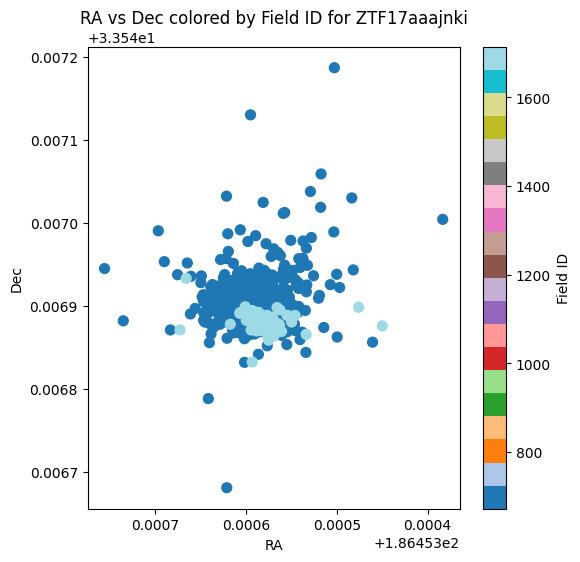

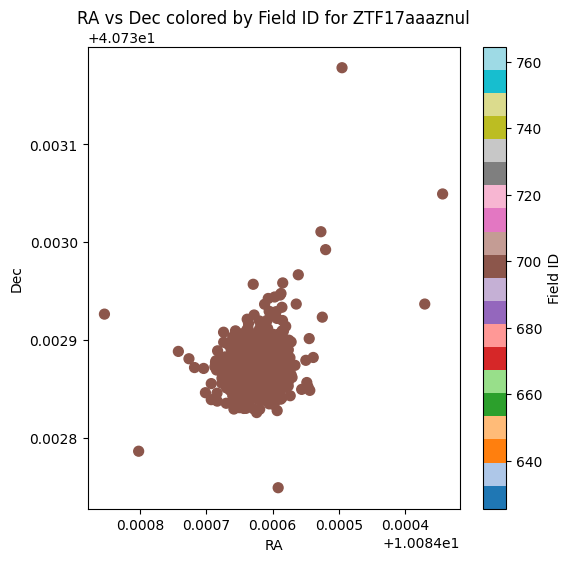

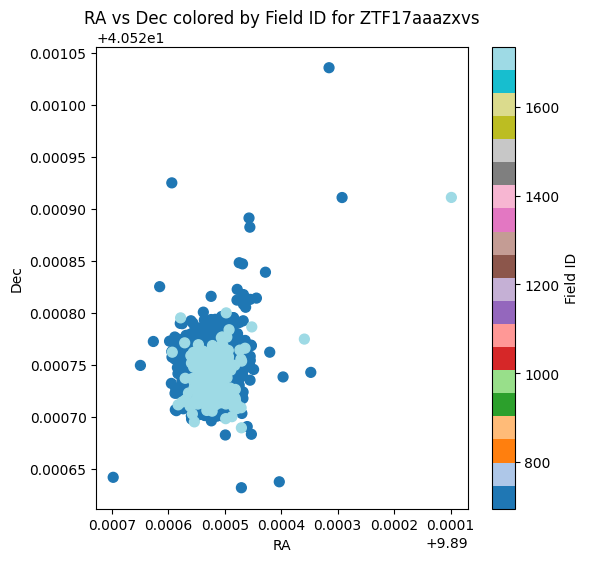

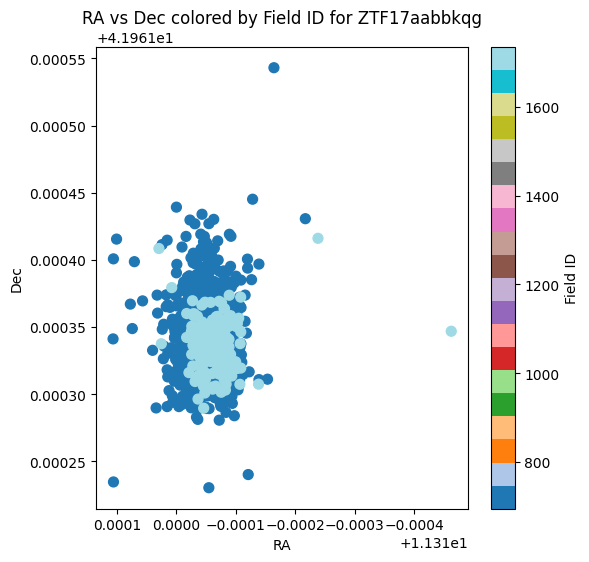

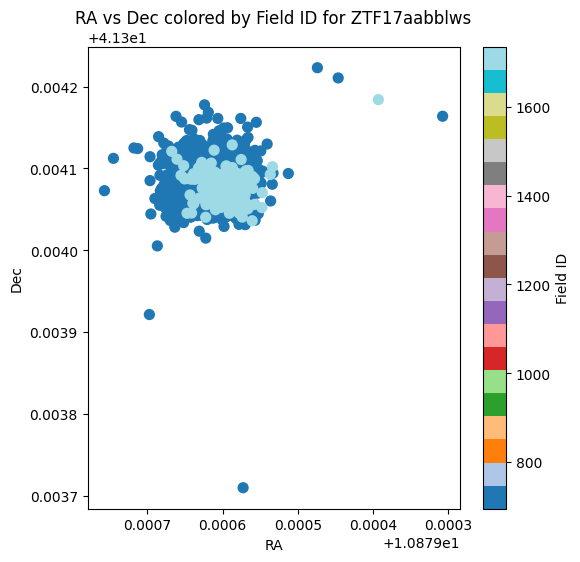

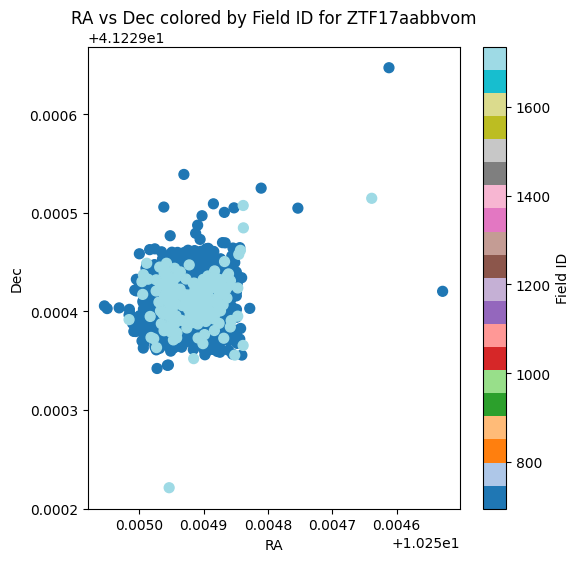

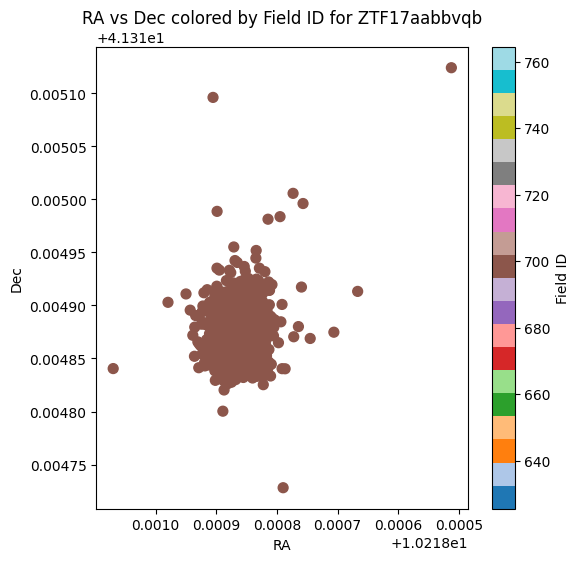

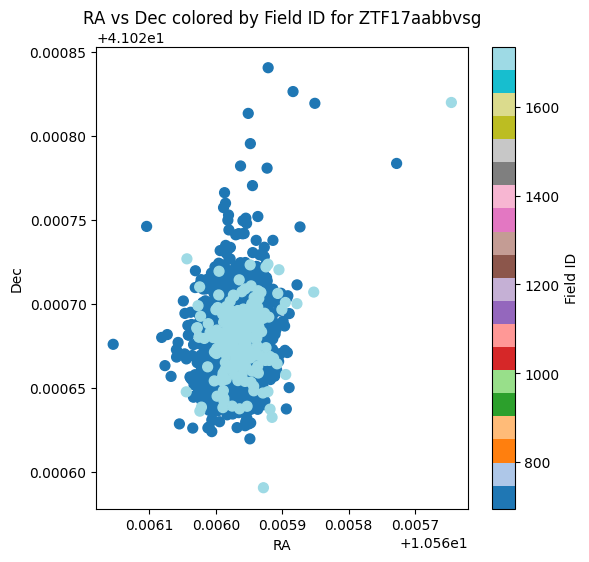

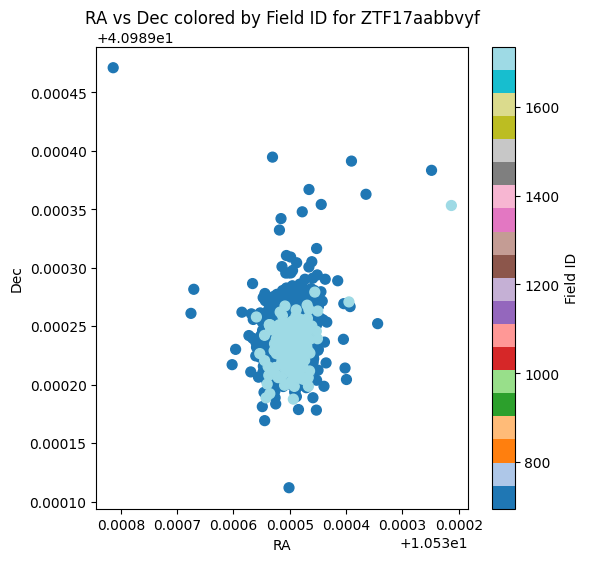

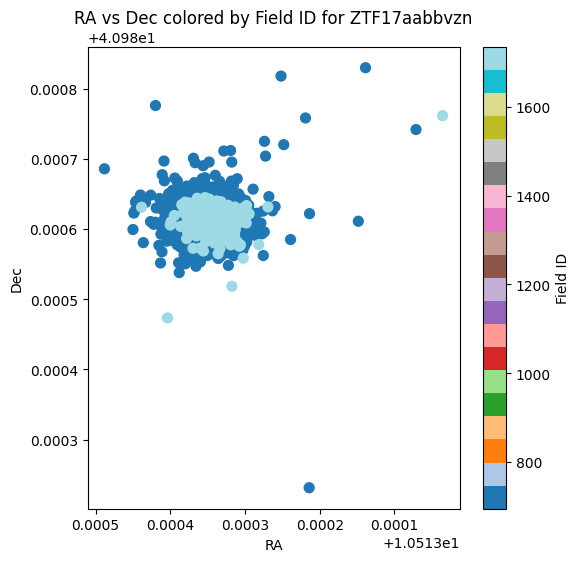

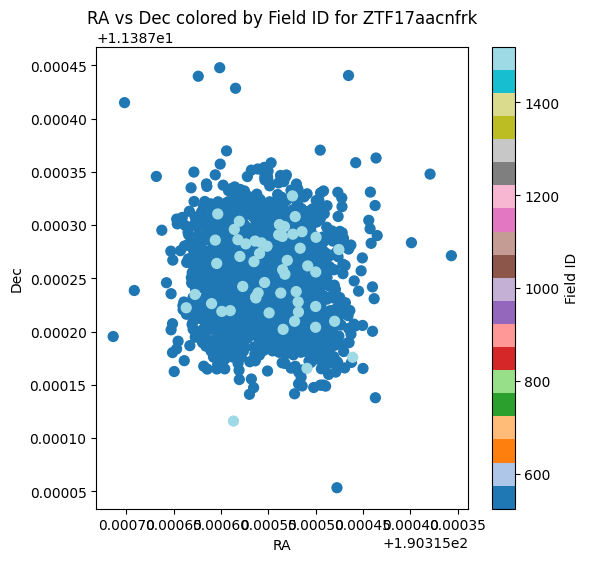

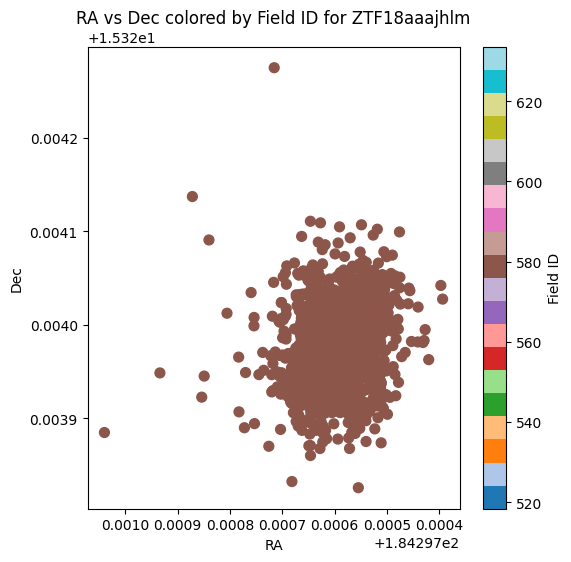

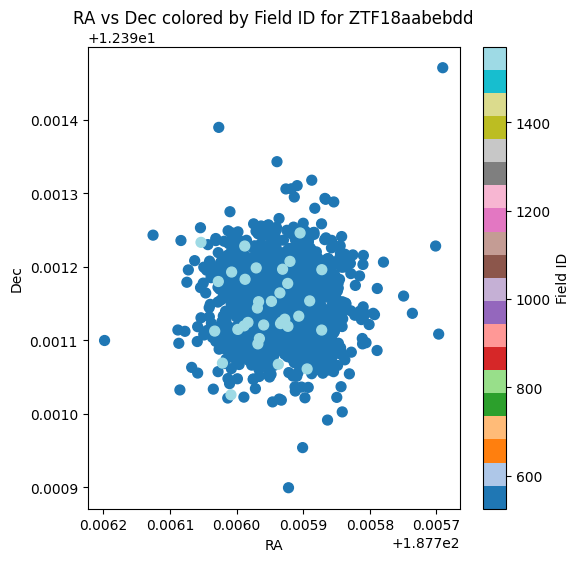

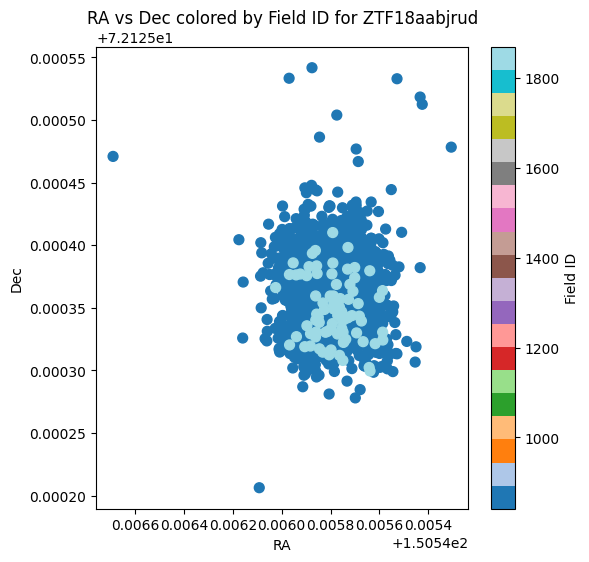

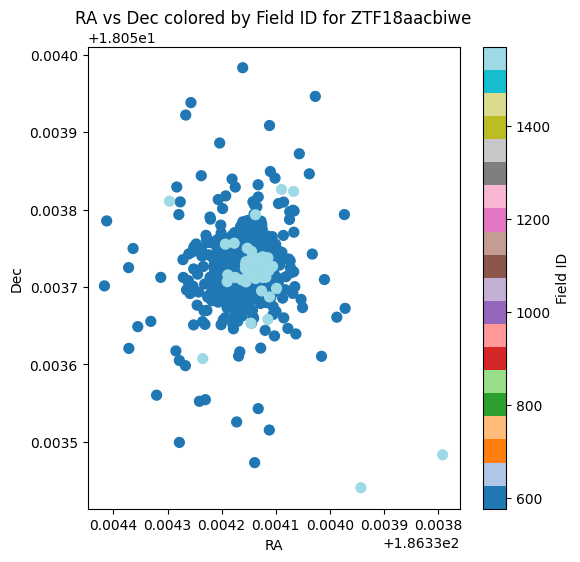

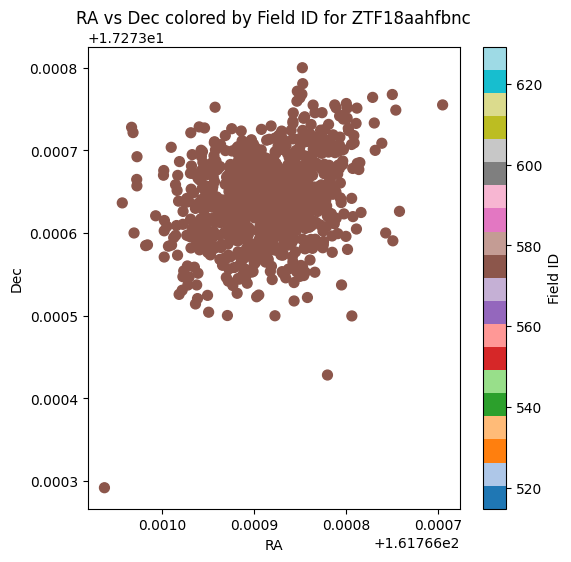

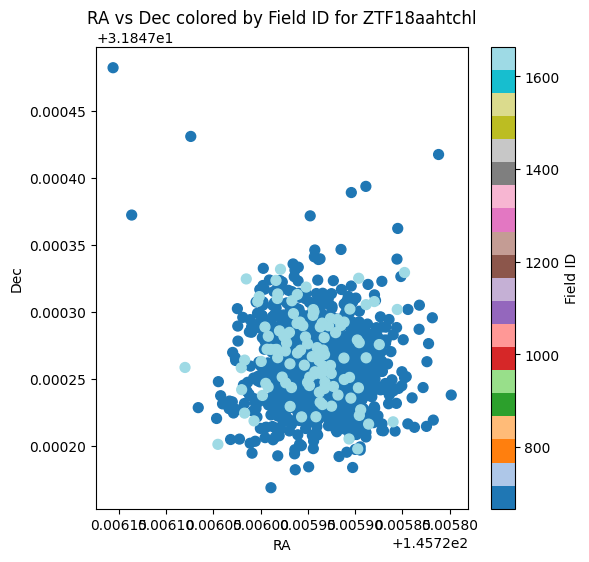

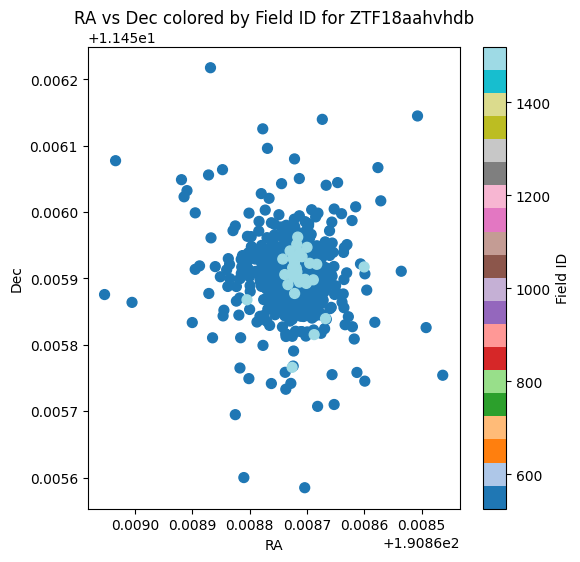

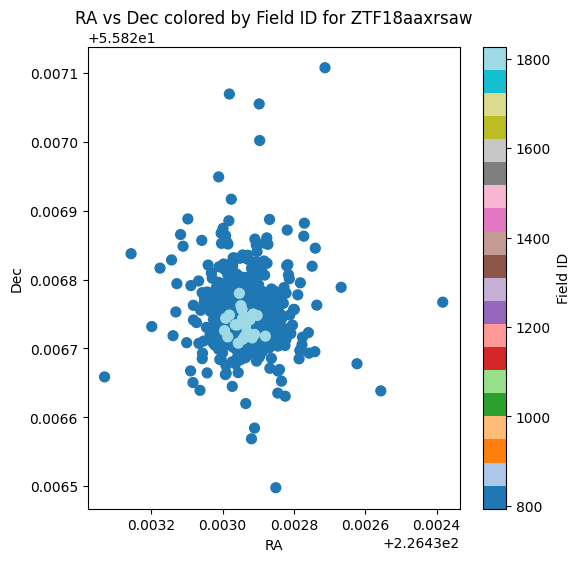

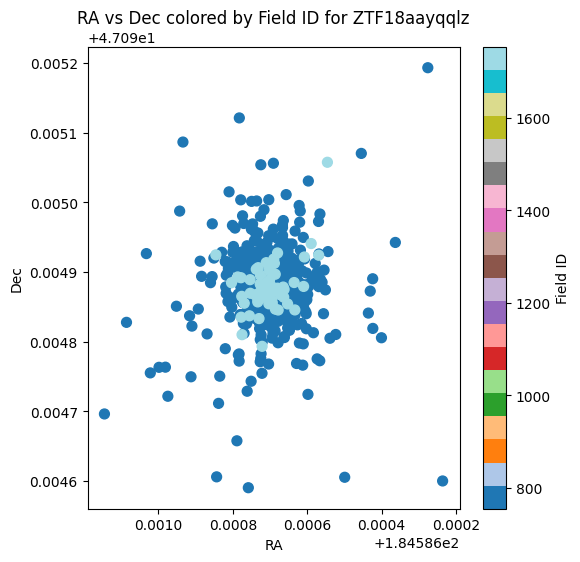

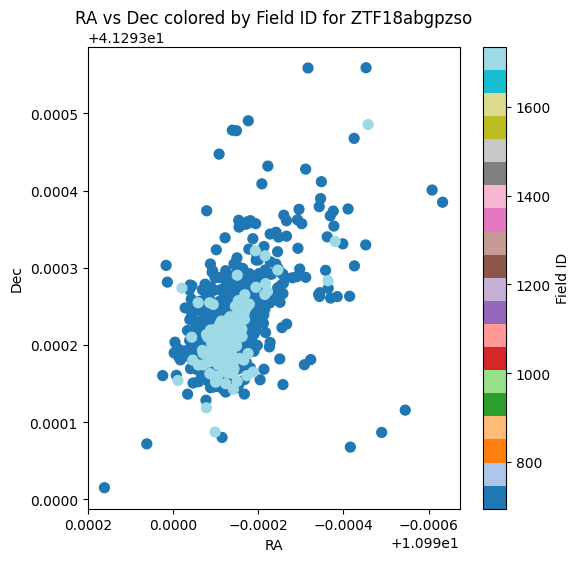

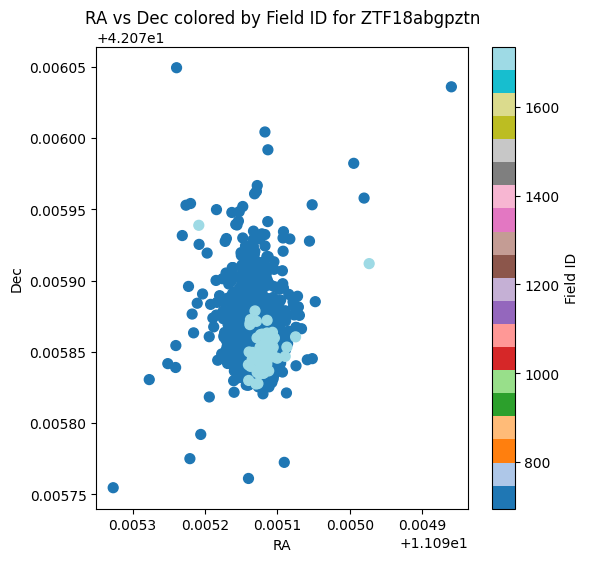

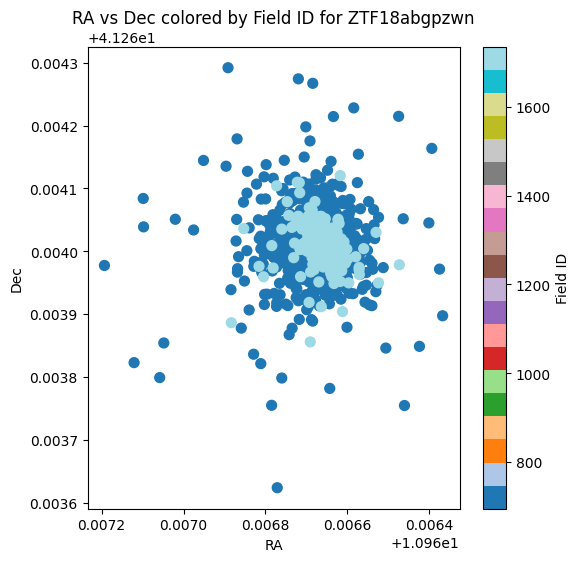

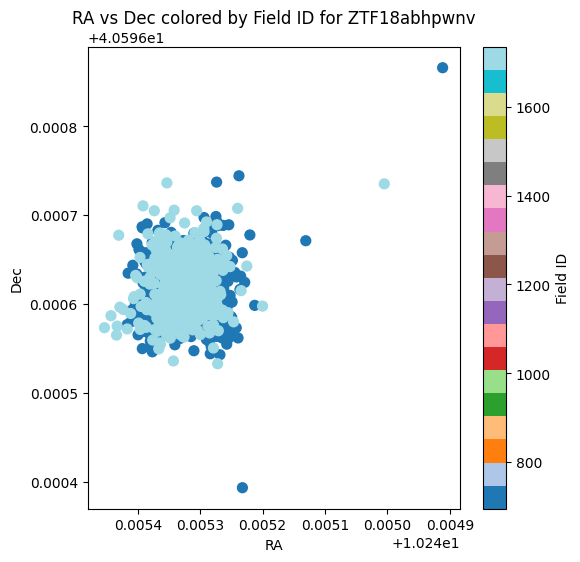

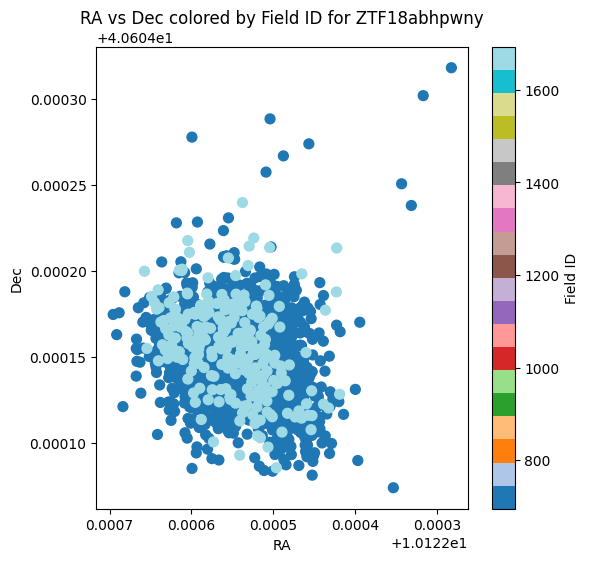

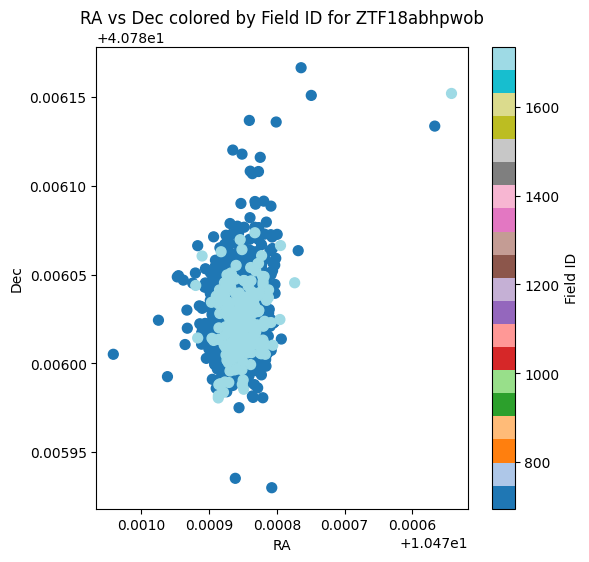

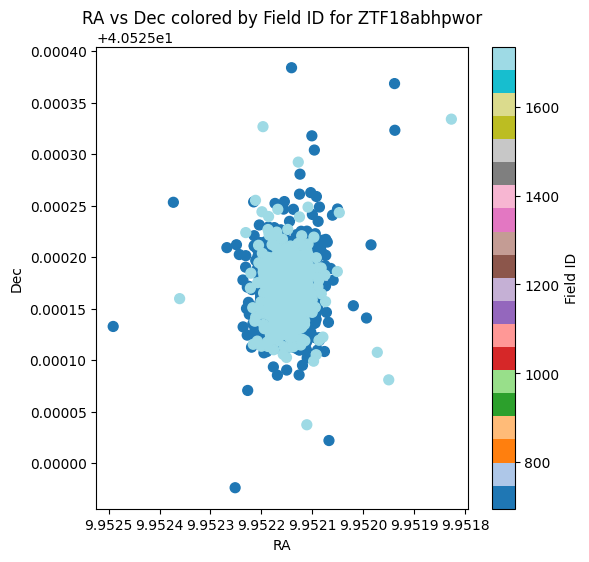

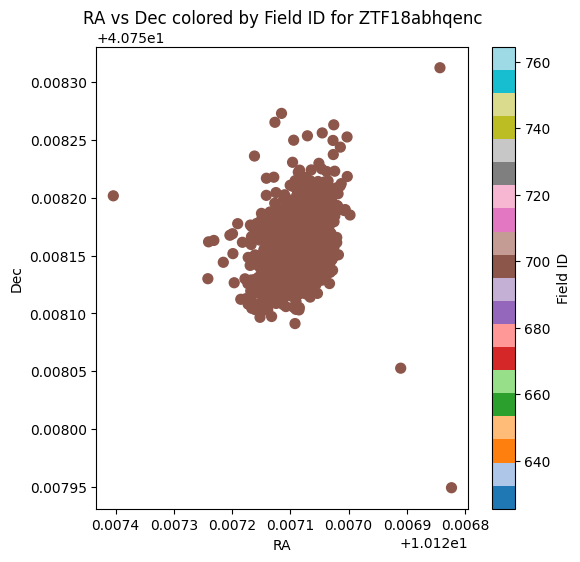

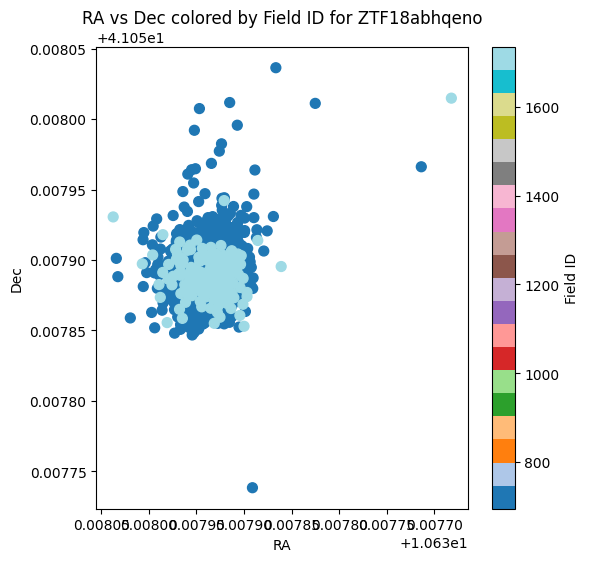

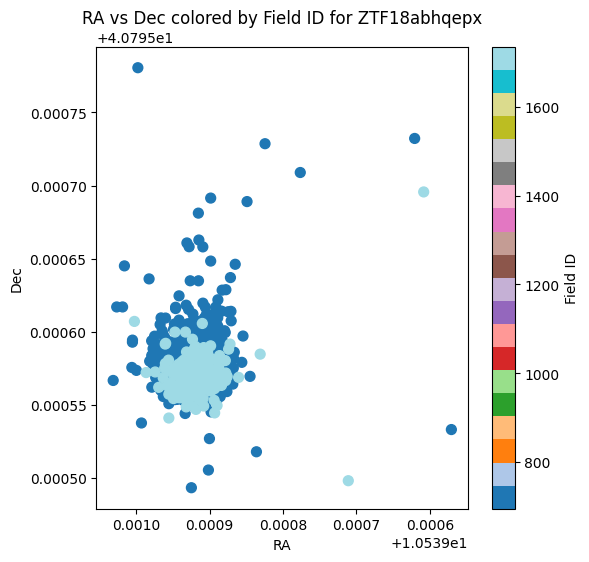

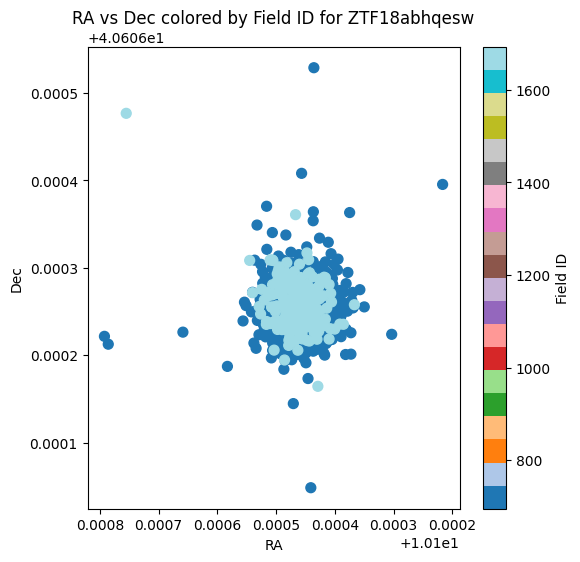

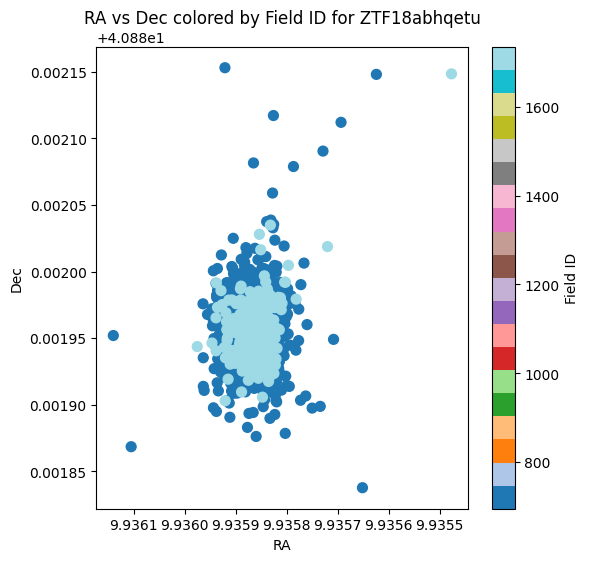

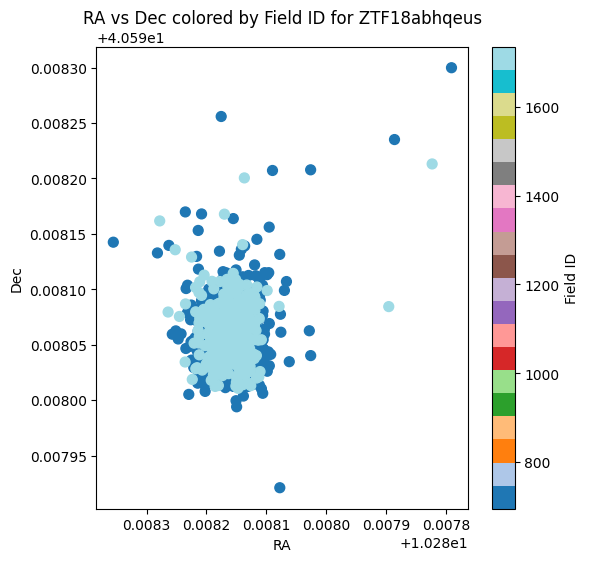

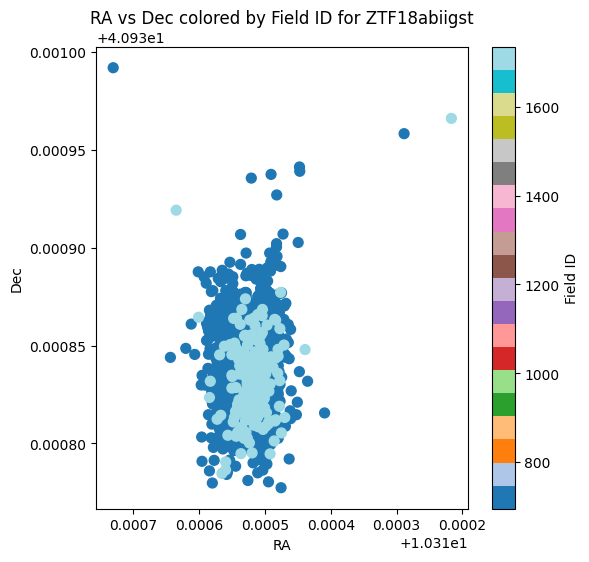

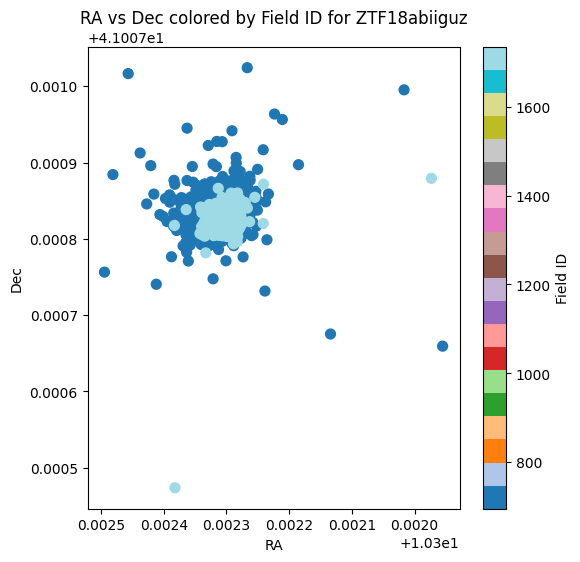

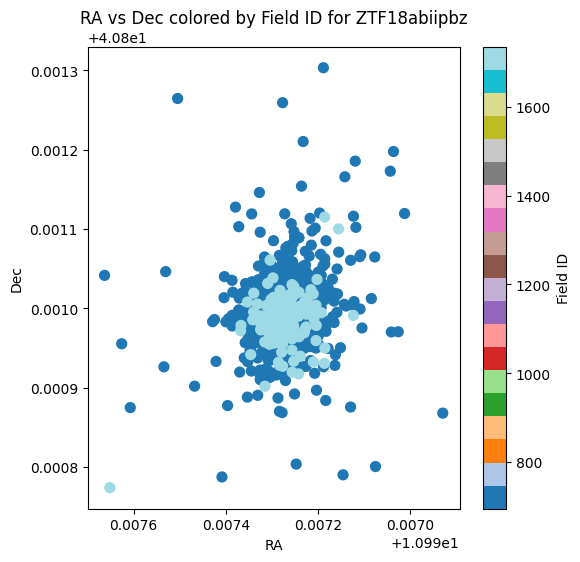

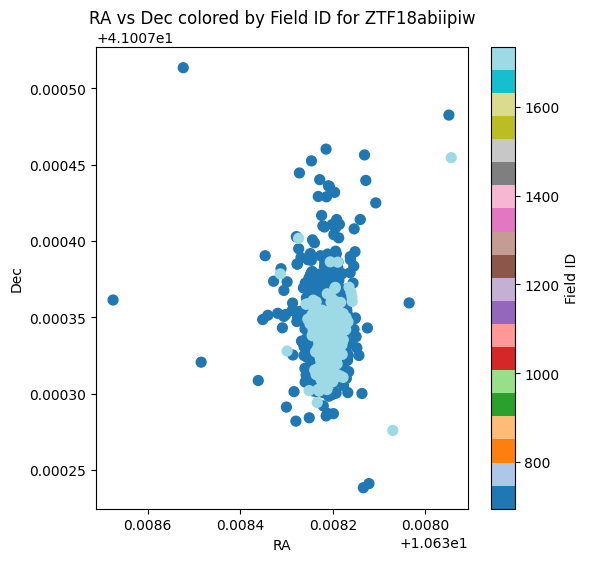

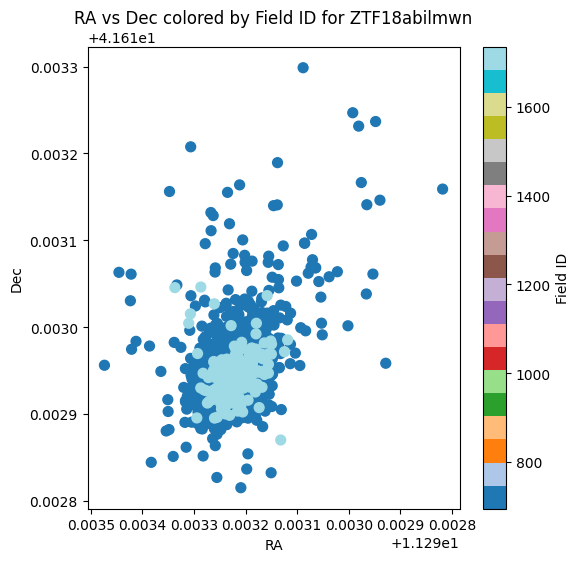

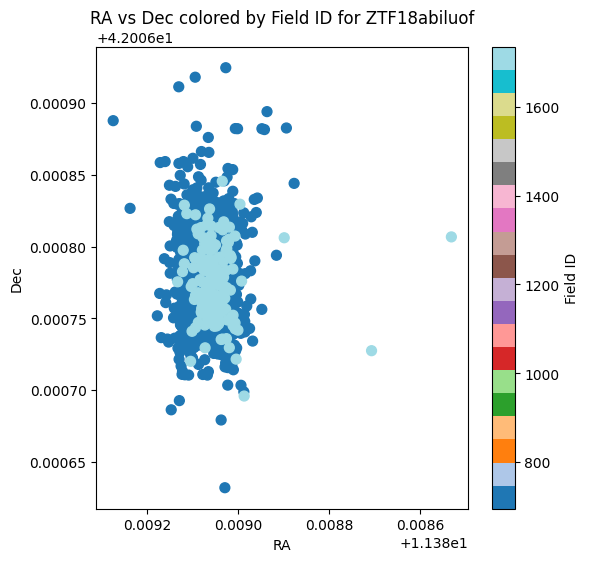

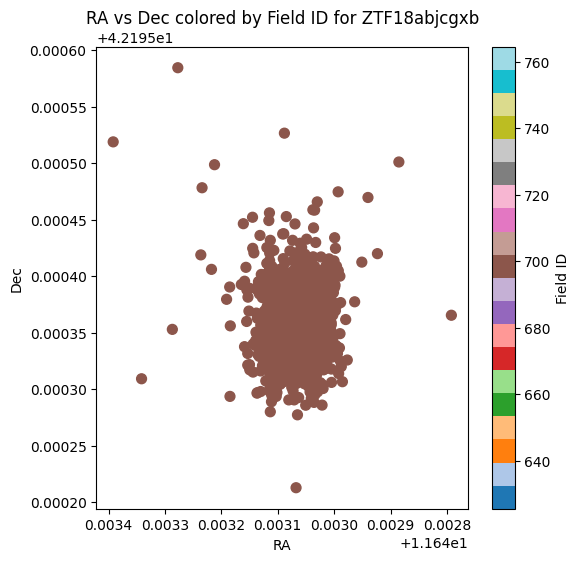

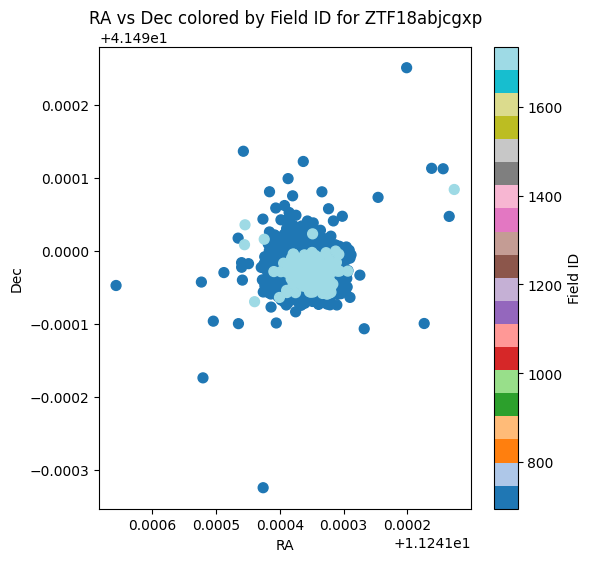

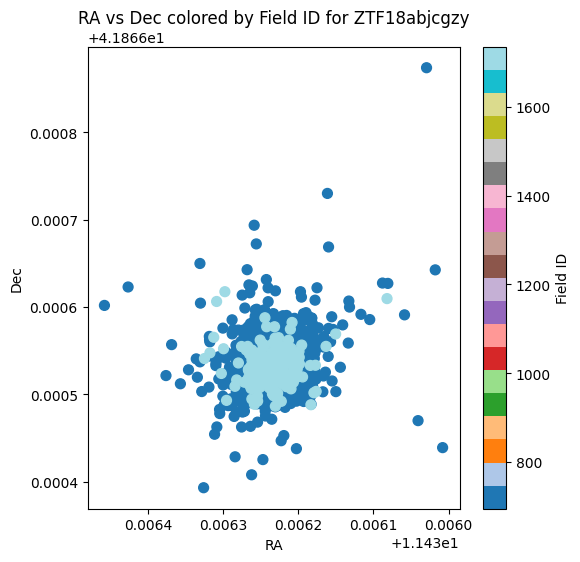

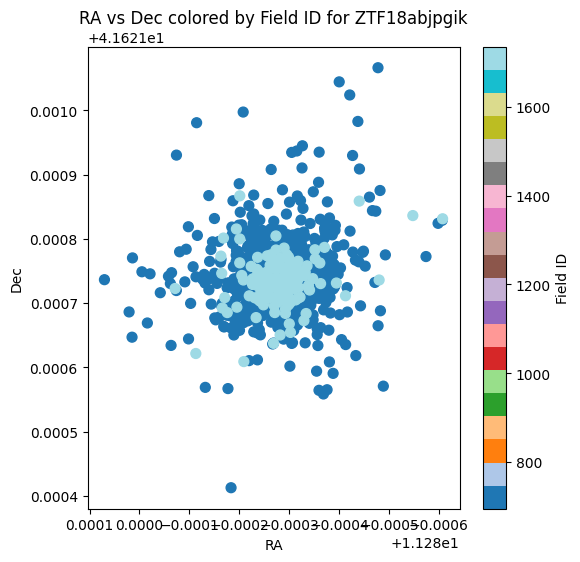

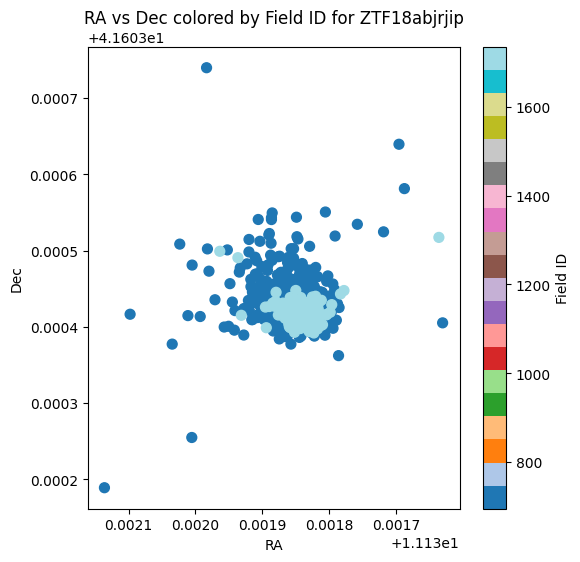

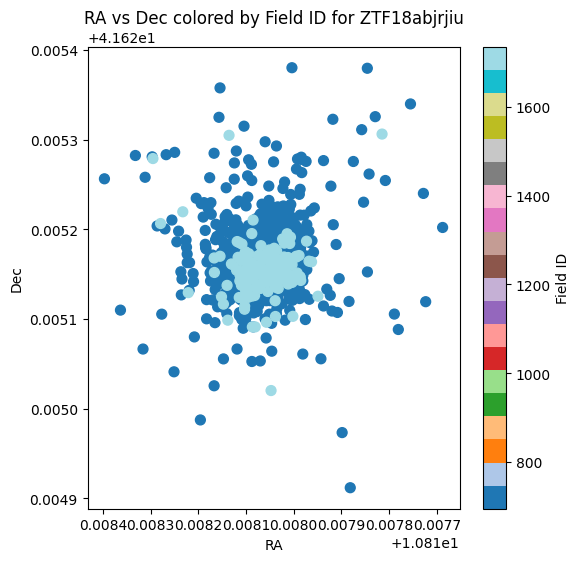

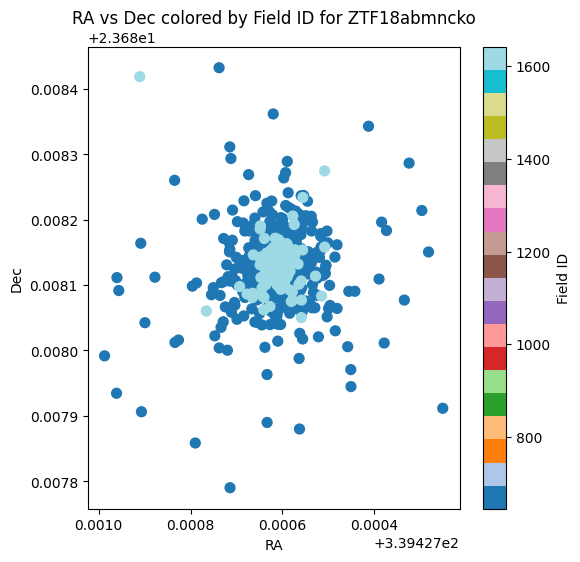

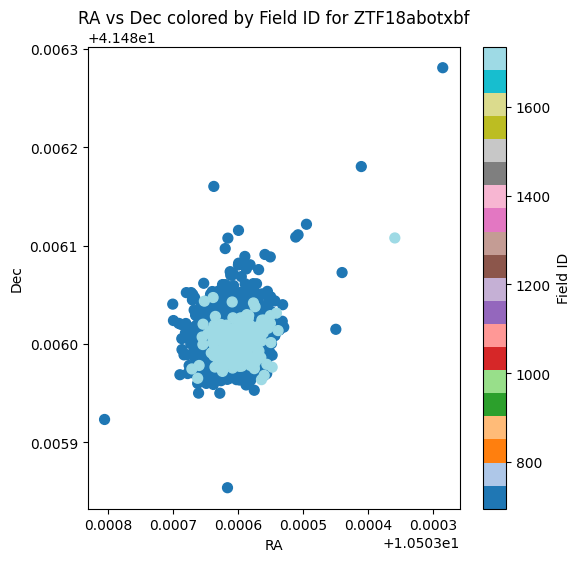

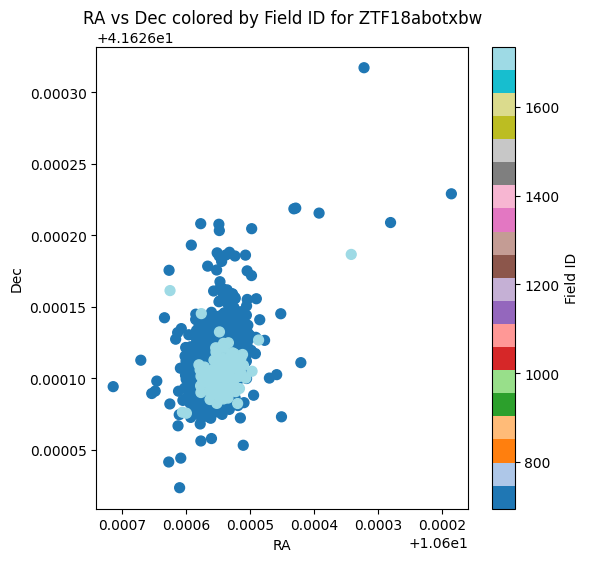

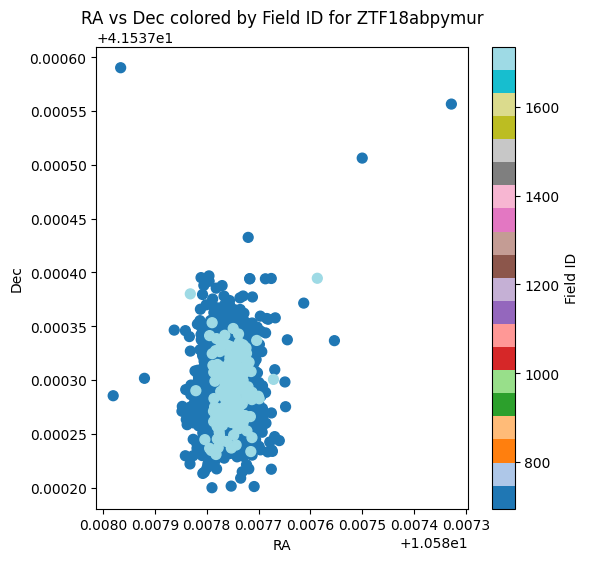

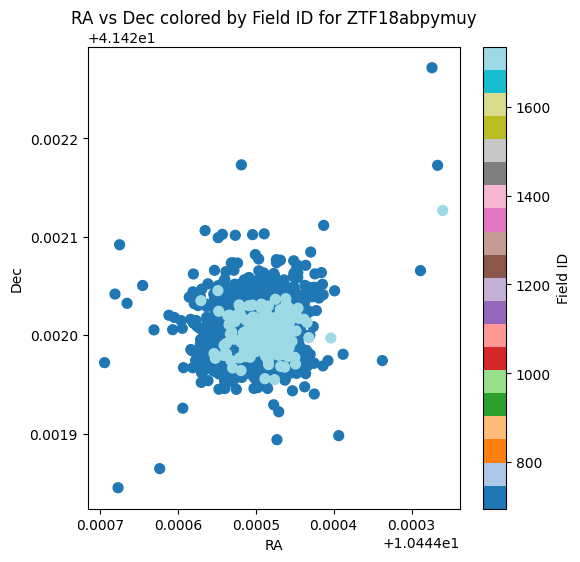

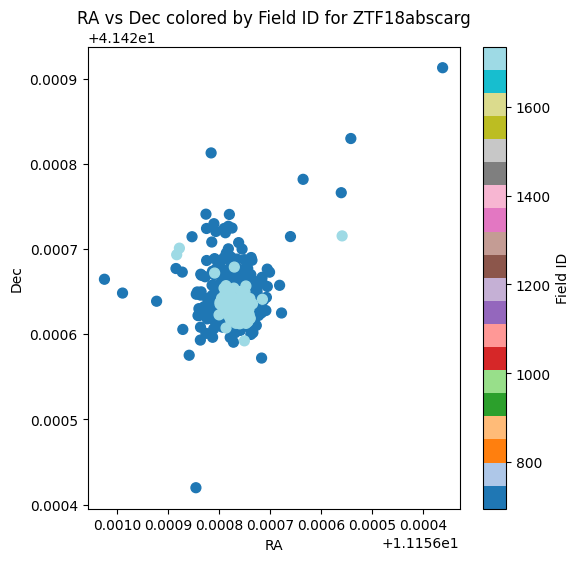

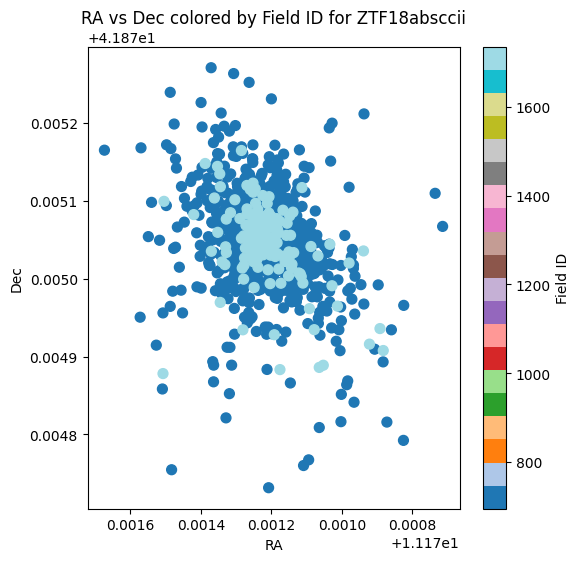

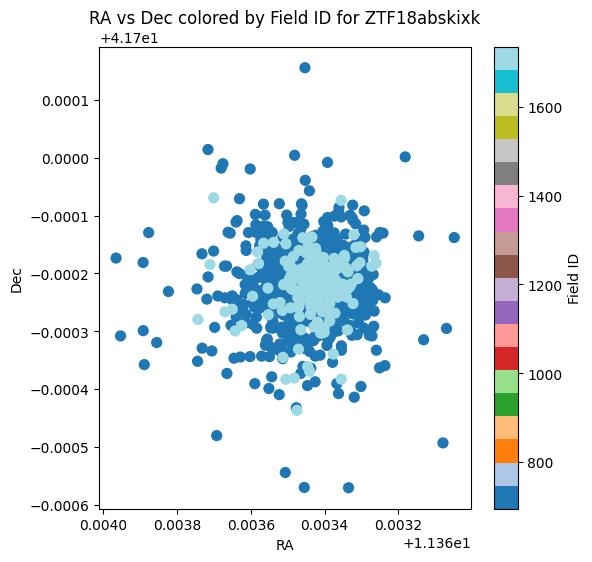

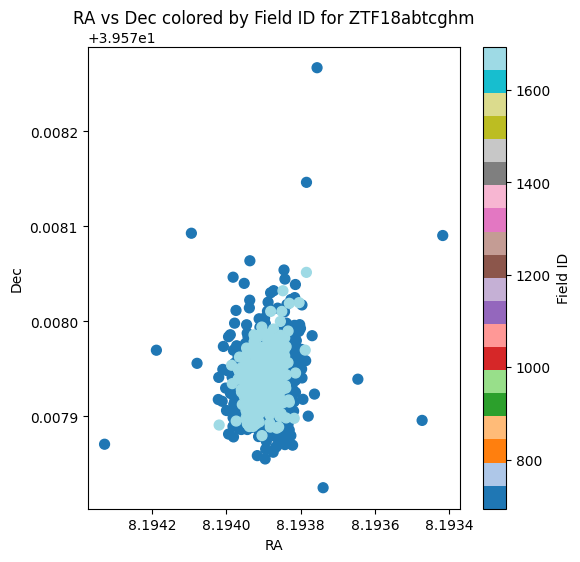

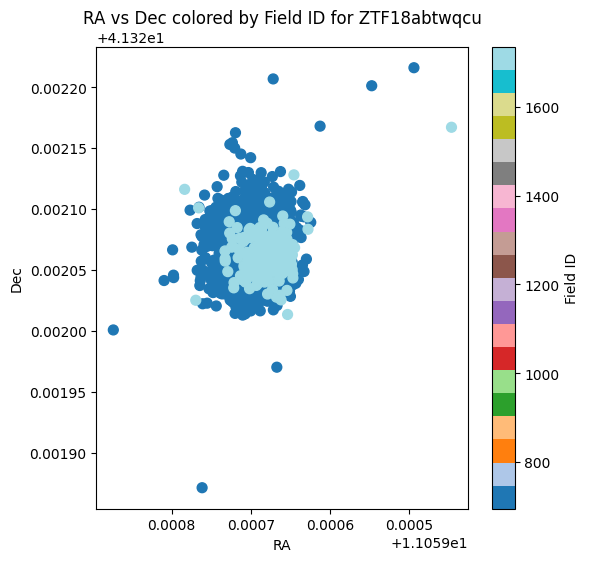

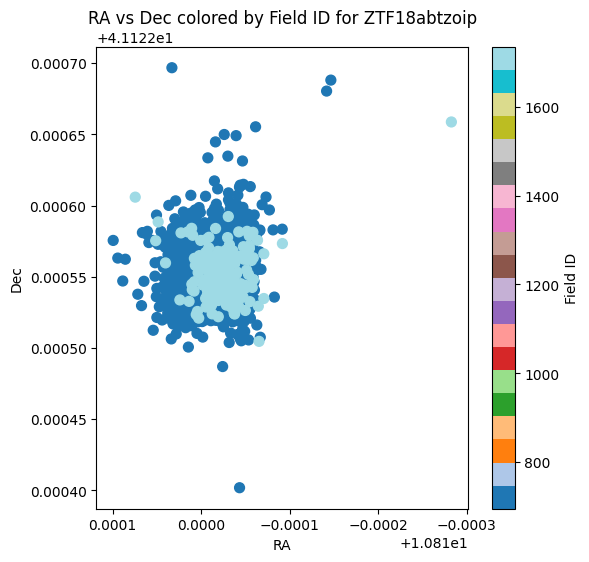

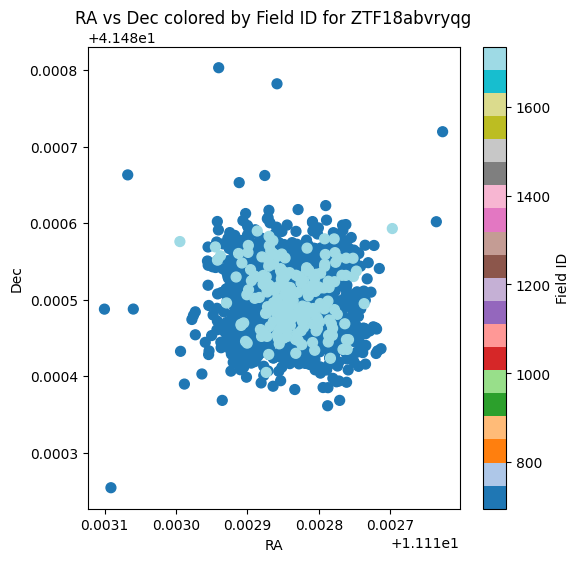

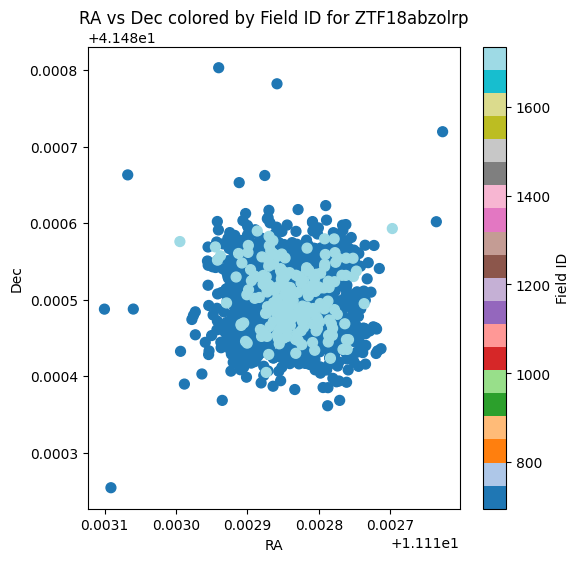

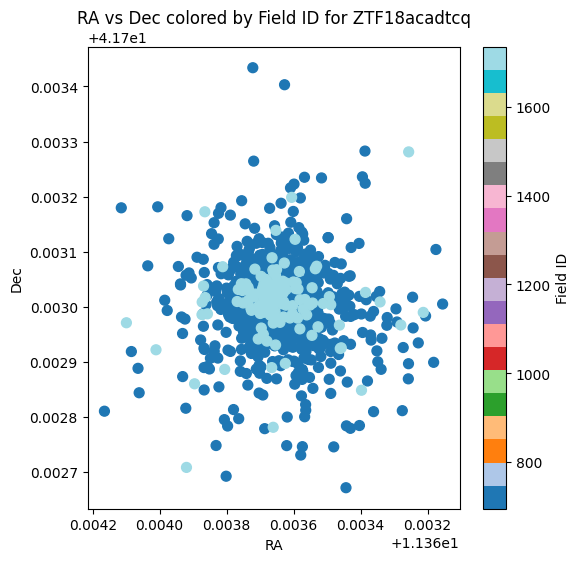

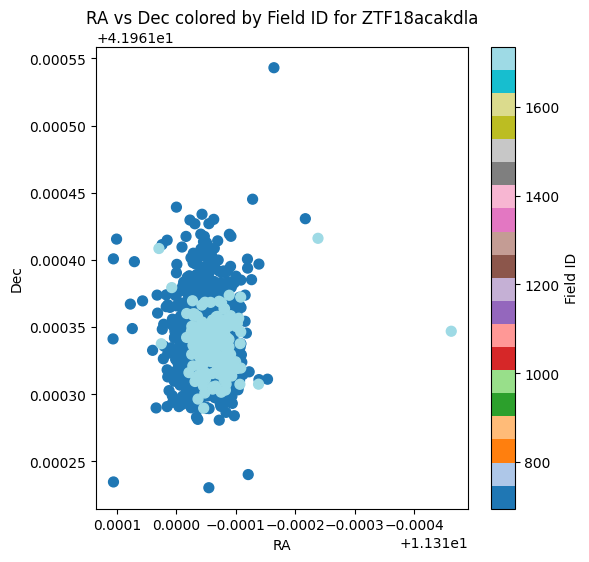

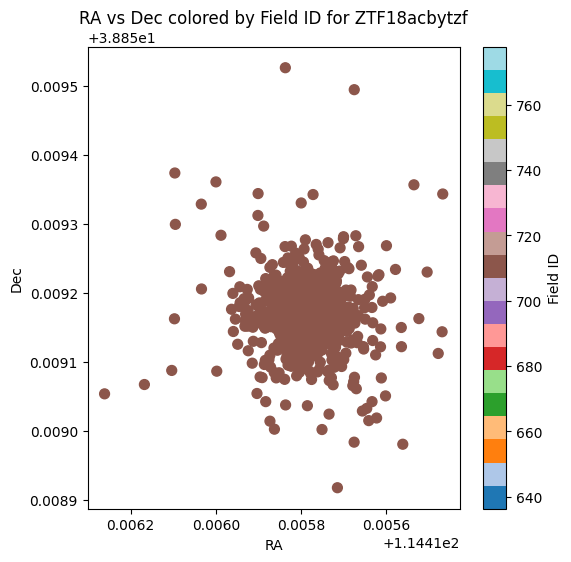

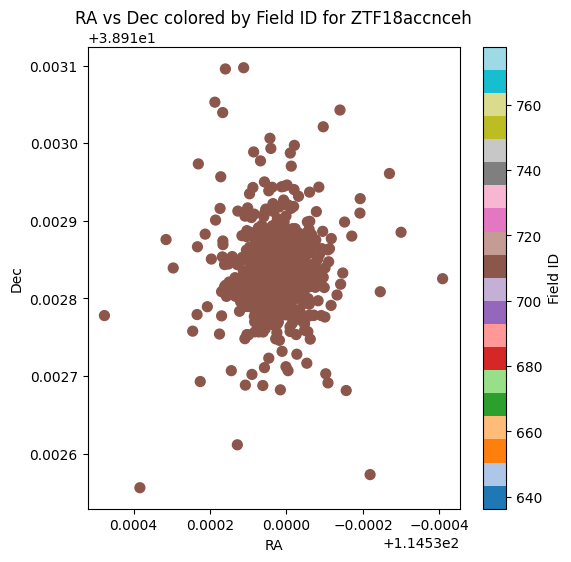

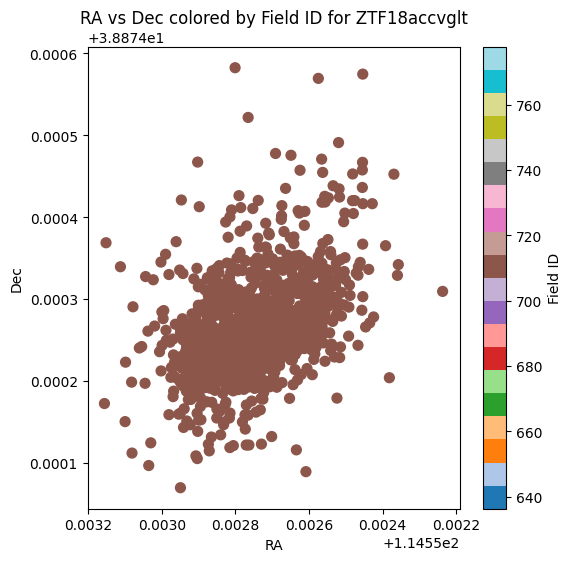

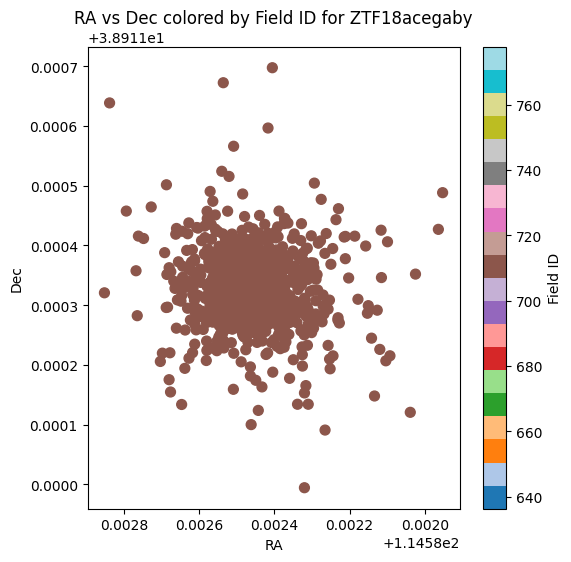

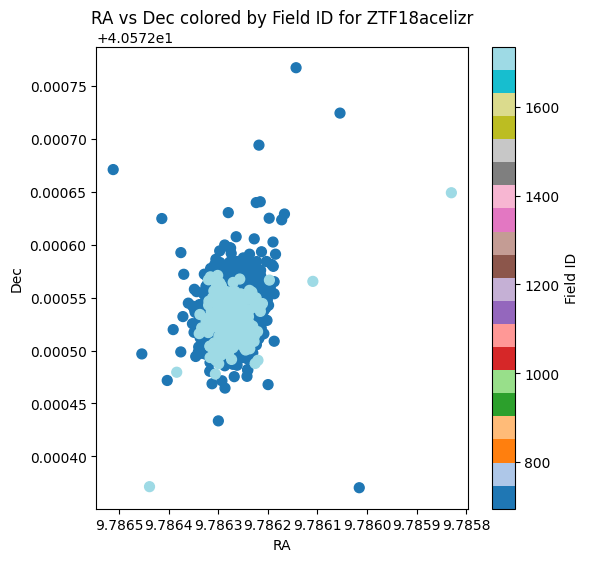

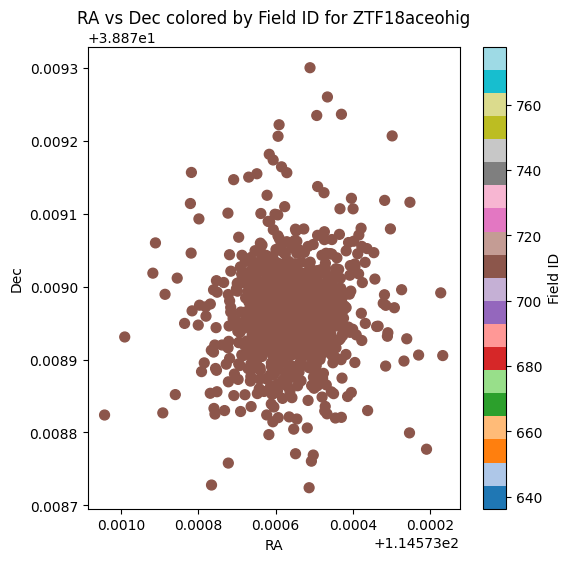

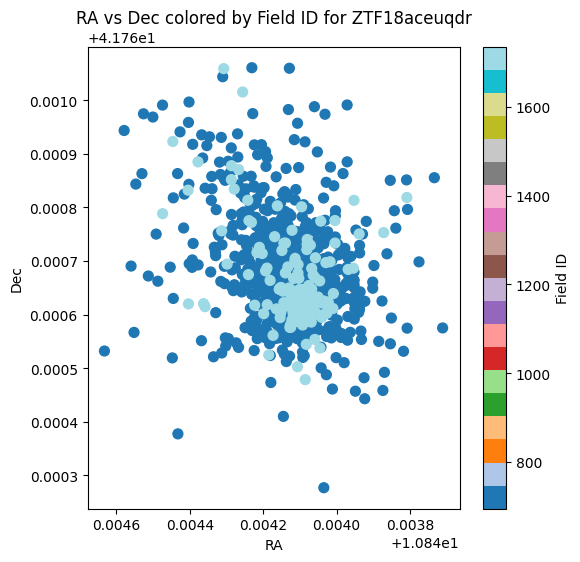

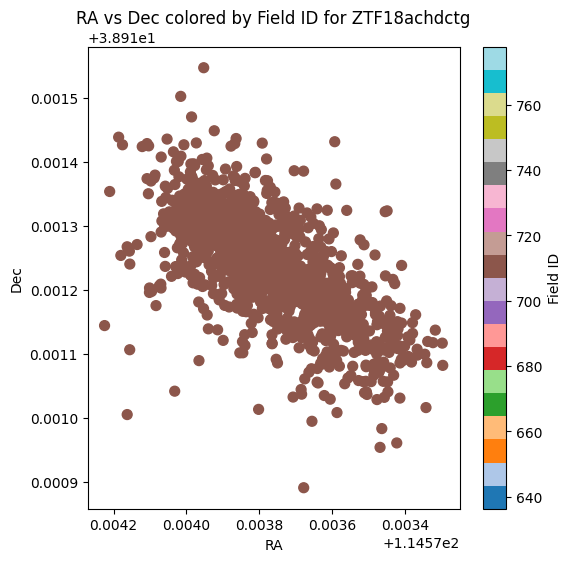

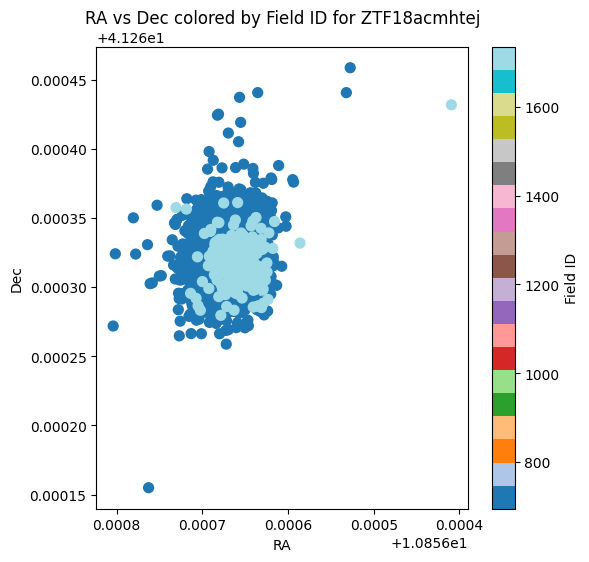

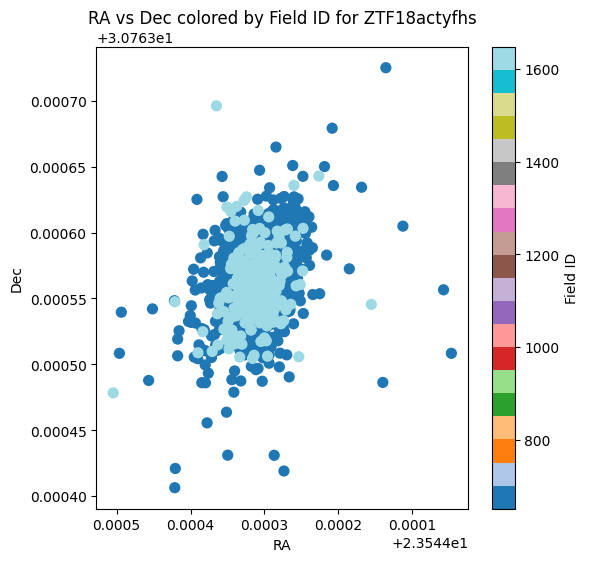

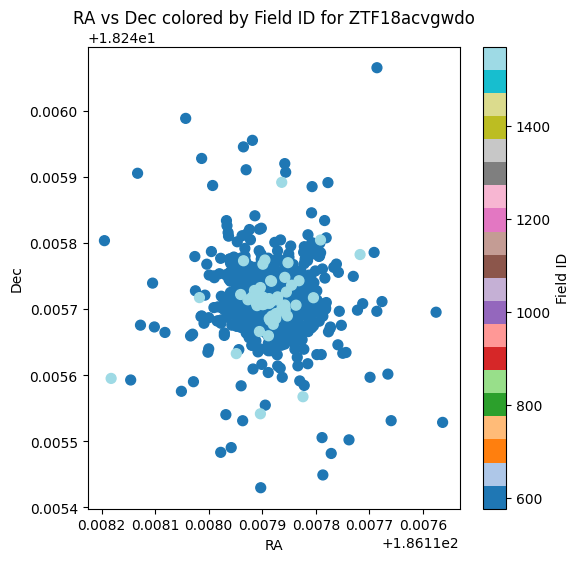

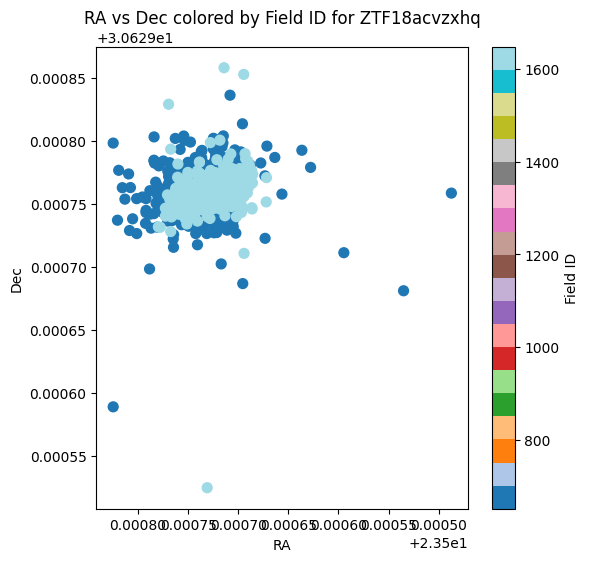

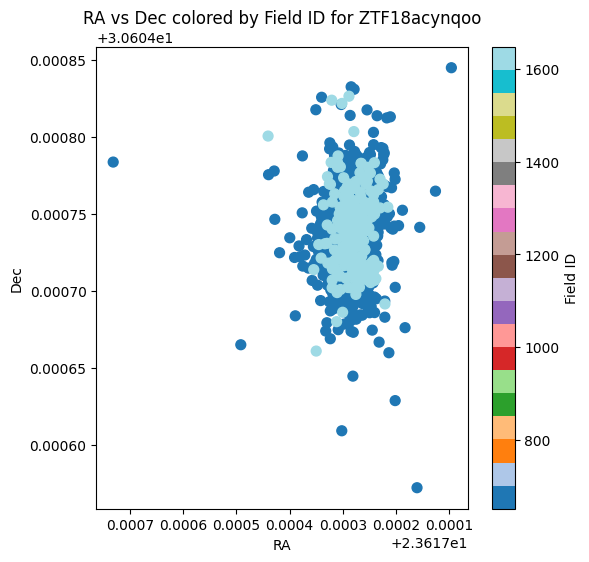

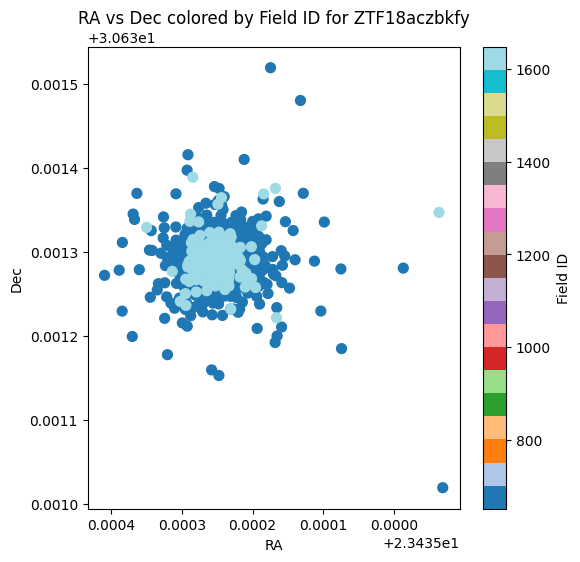

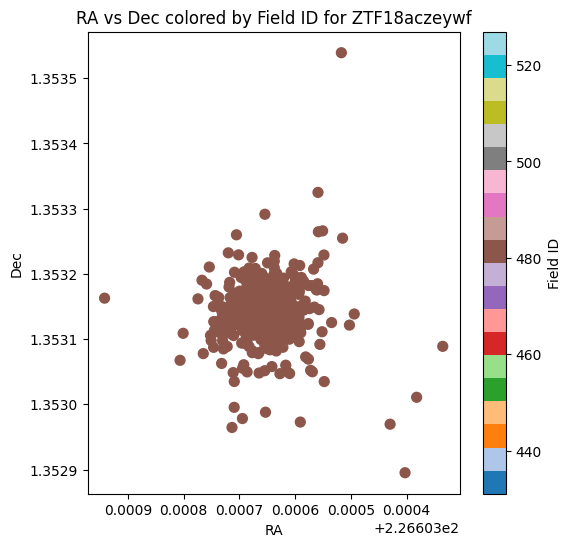

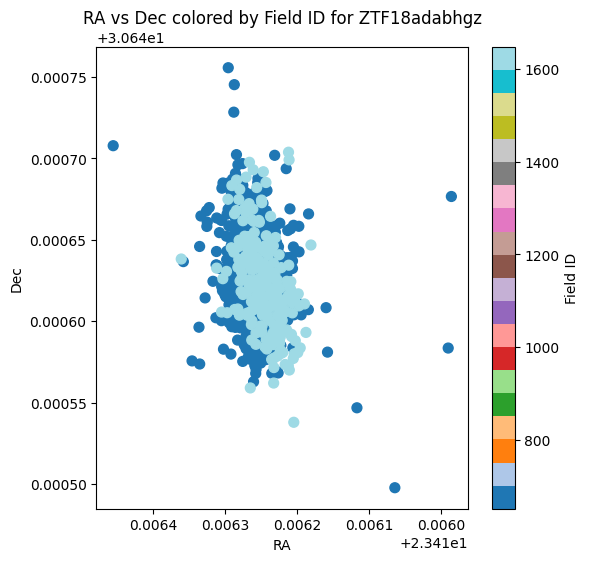

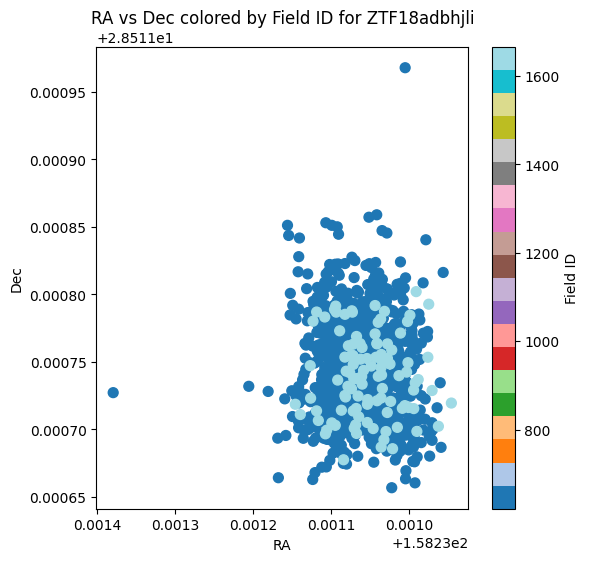

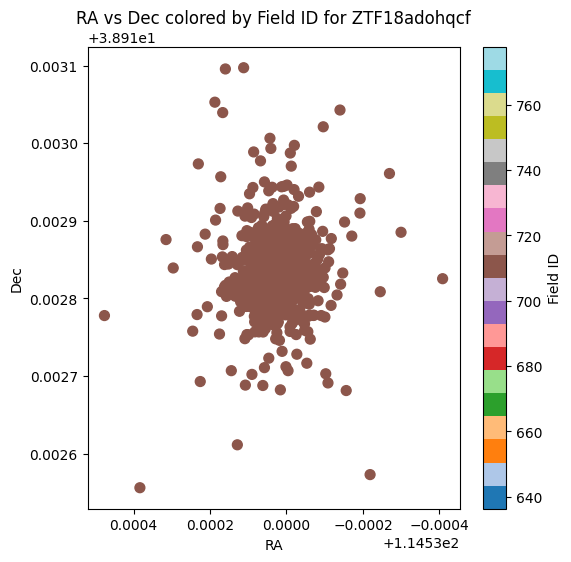

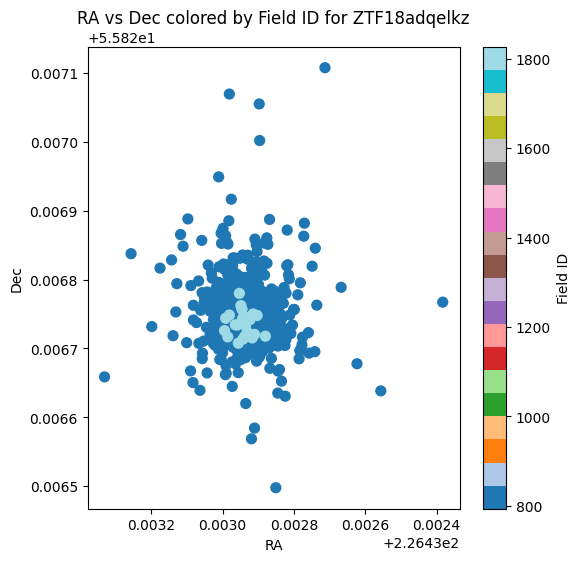

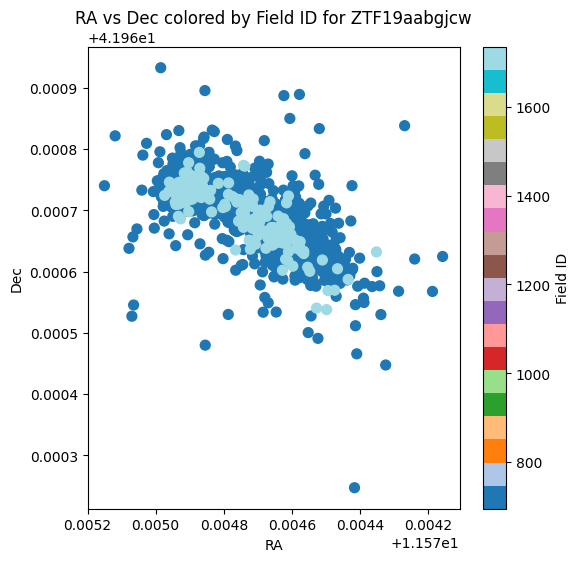

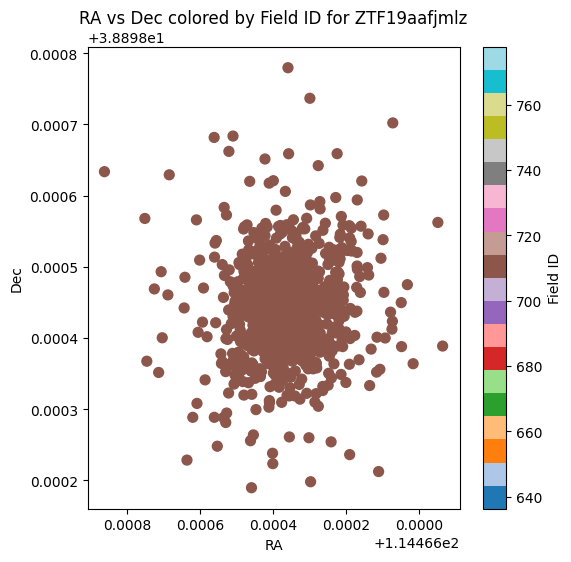

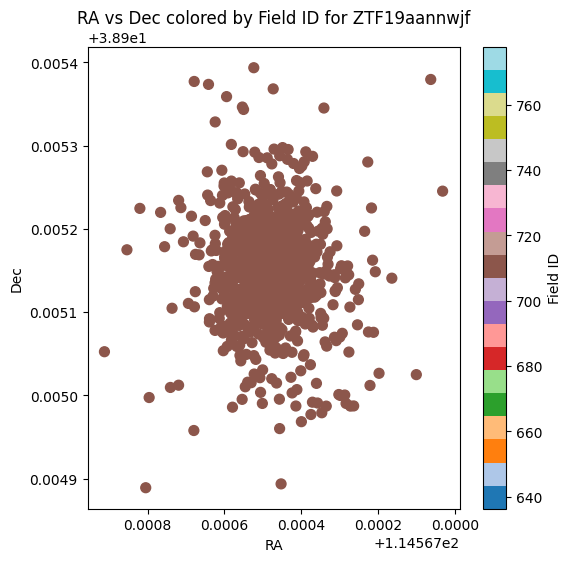

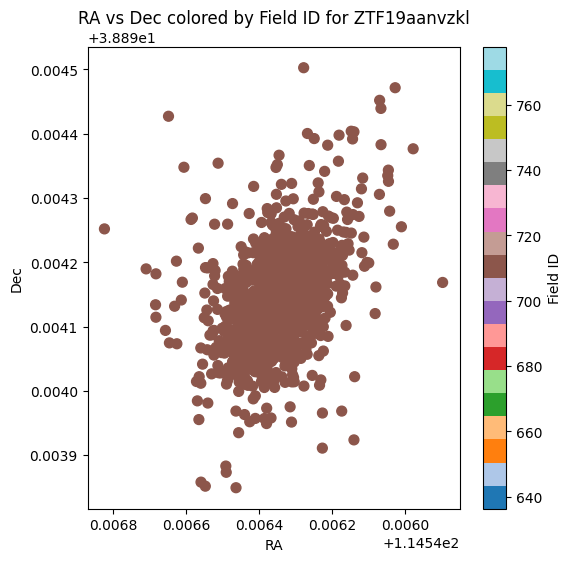

Skipping ZTF19aarsrcs: not enough coords for GMM


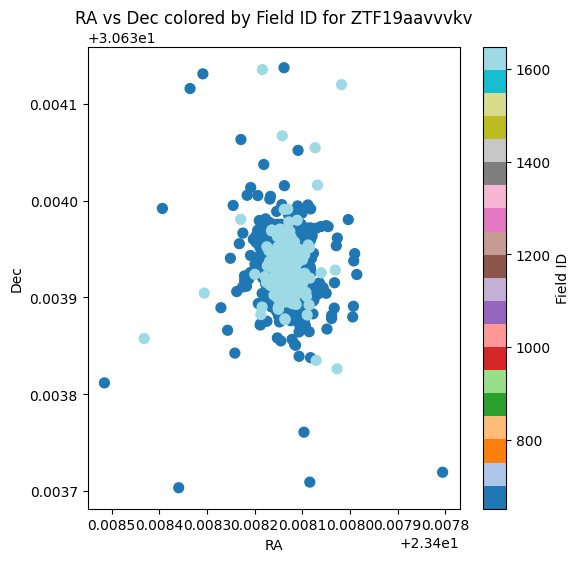

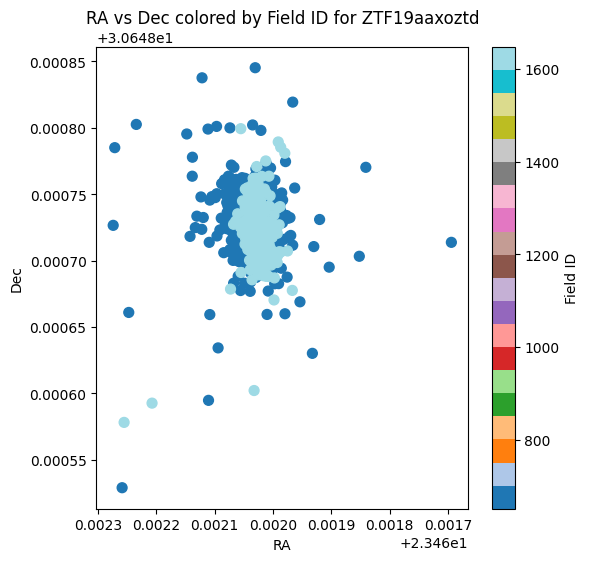

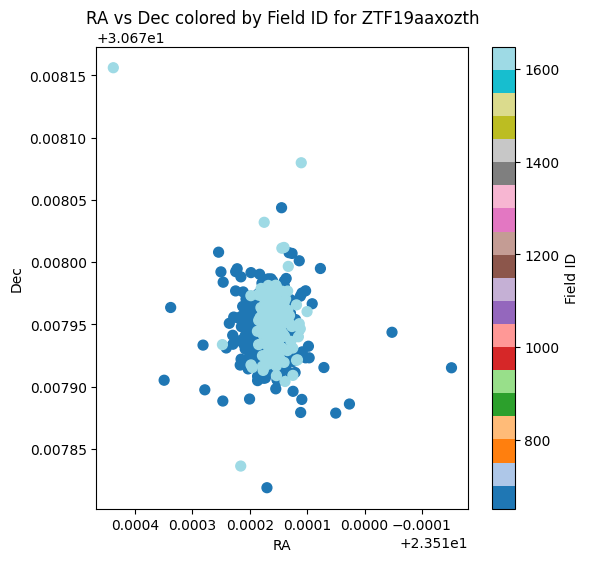

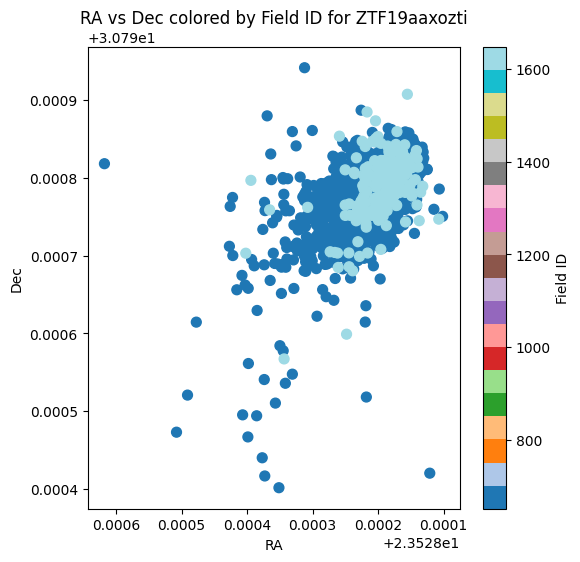

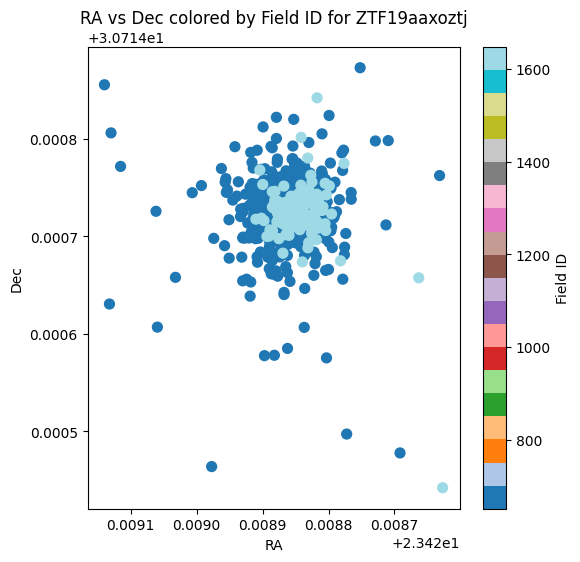

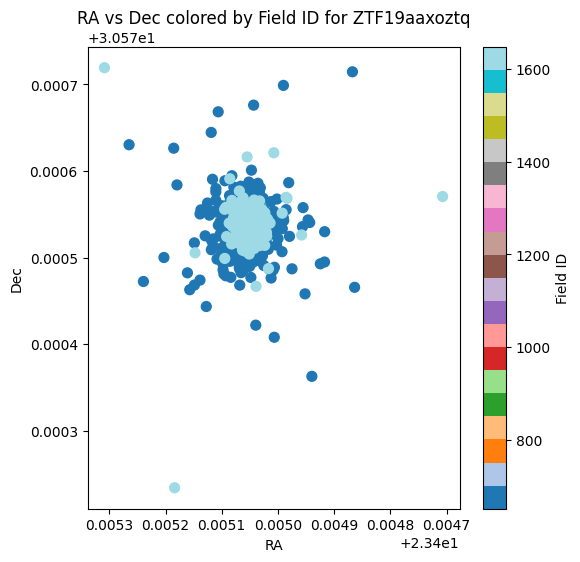

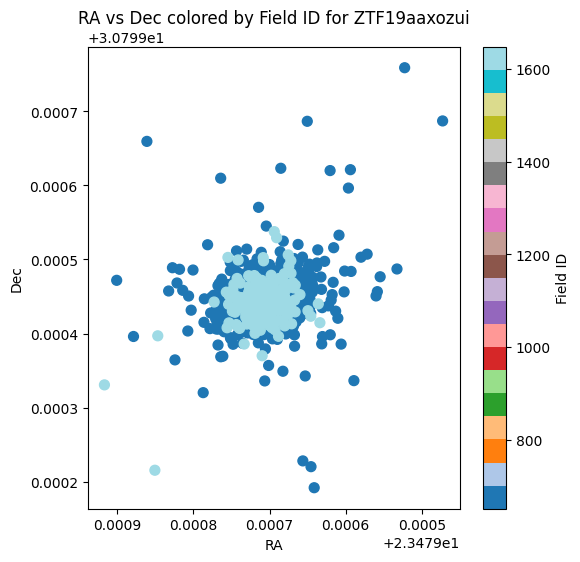

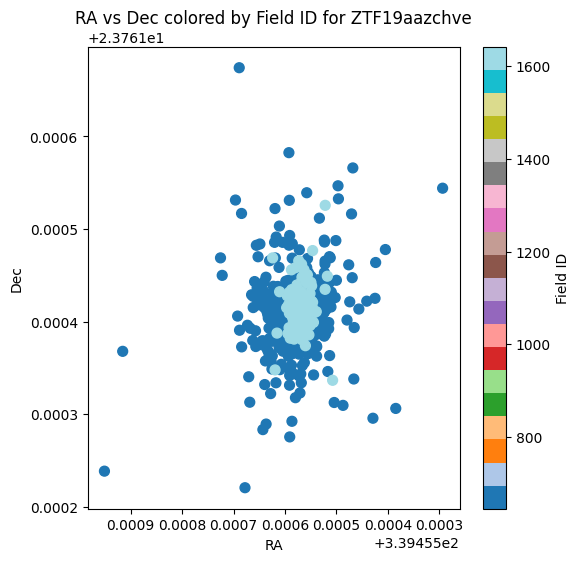

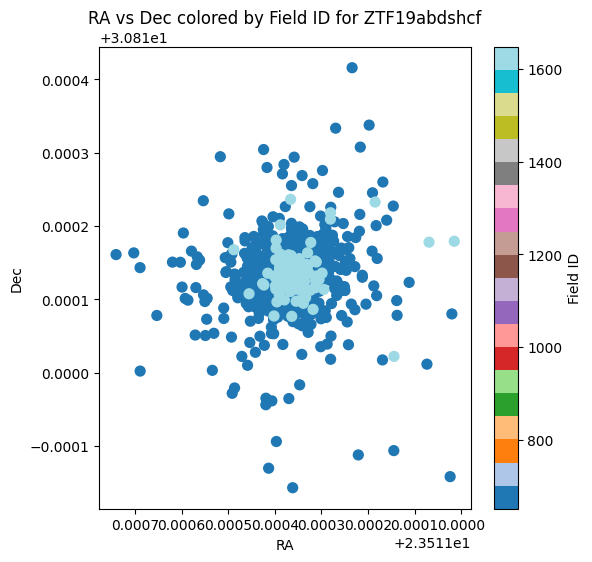

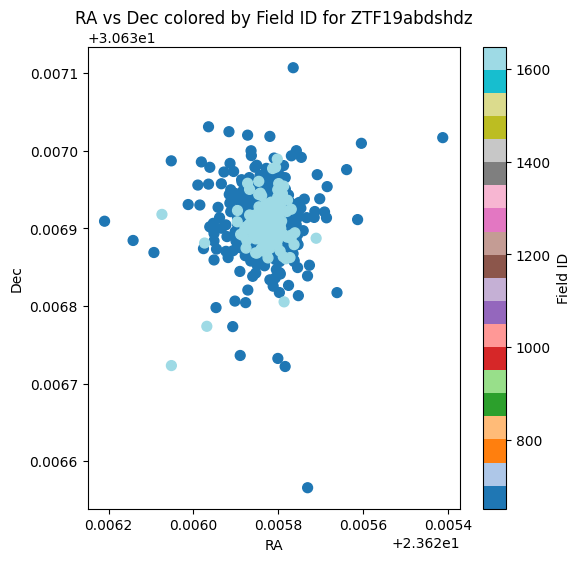

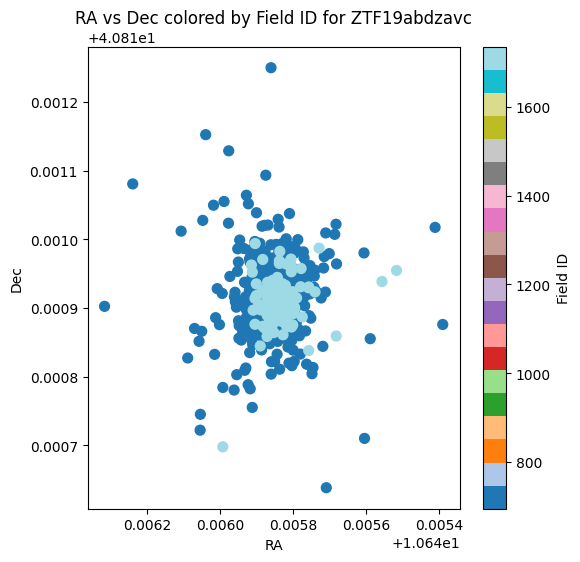

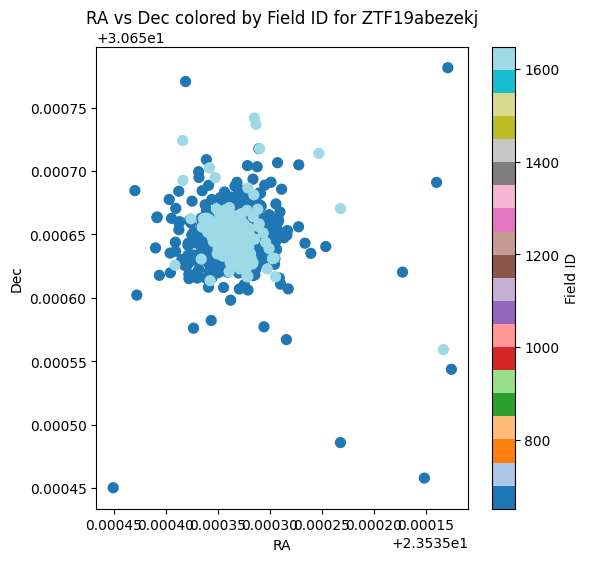

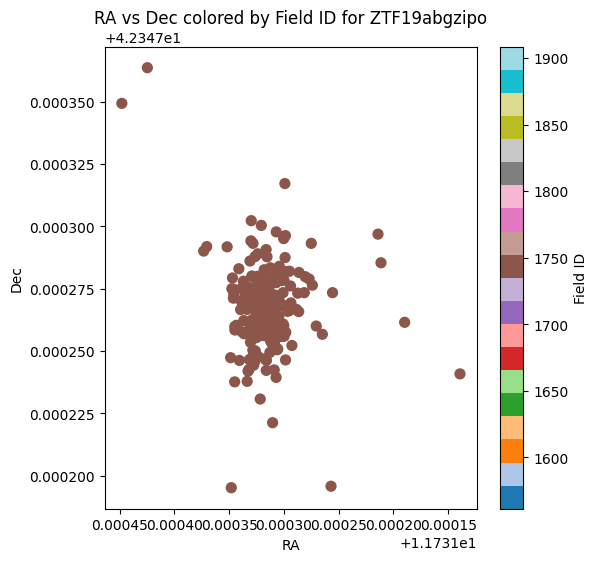

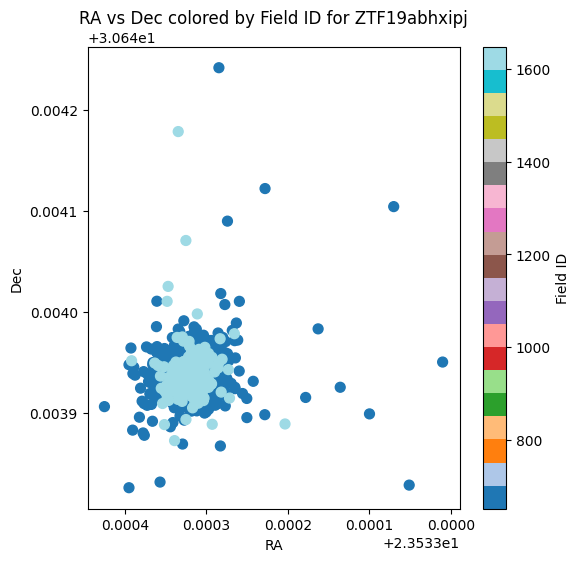

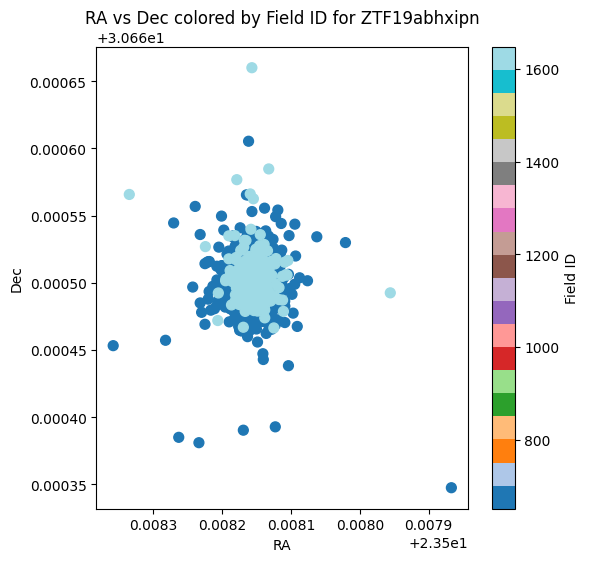

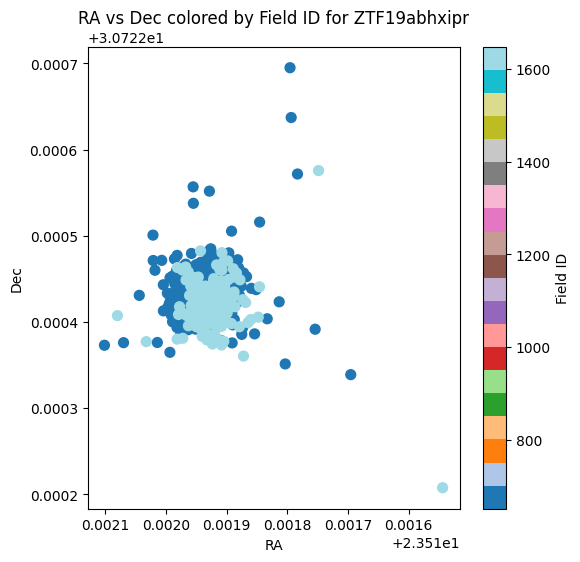

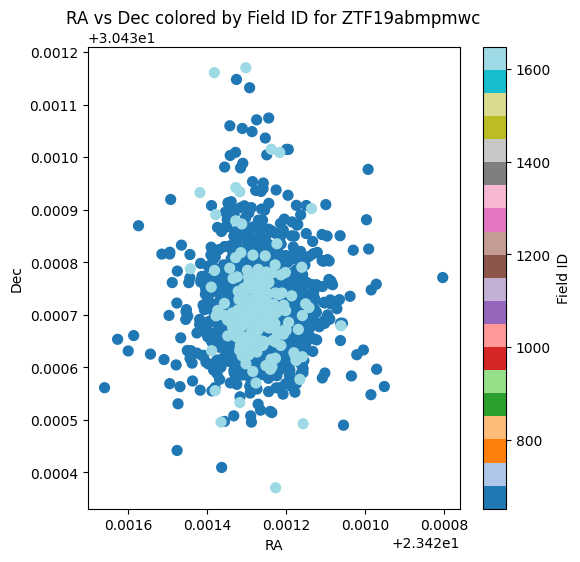

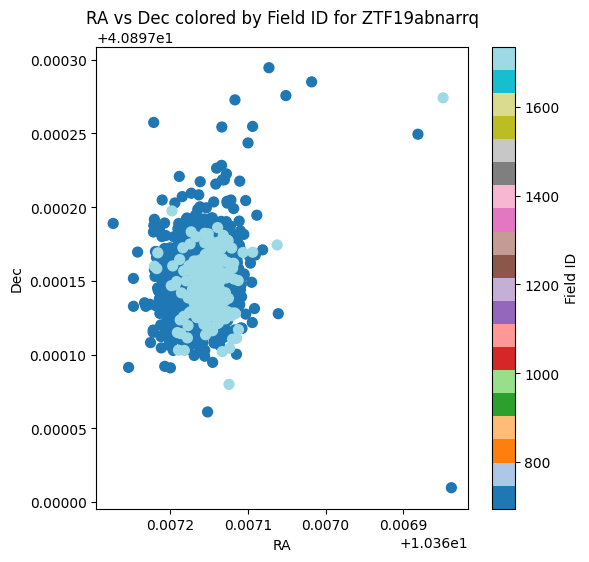

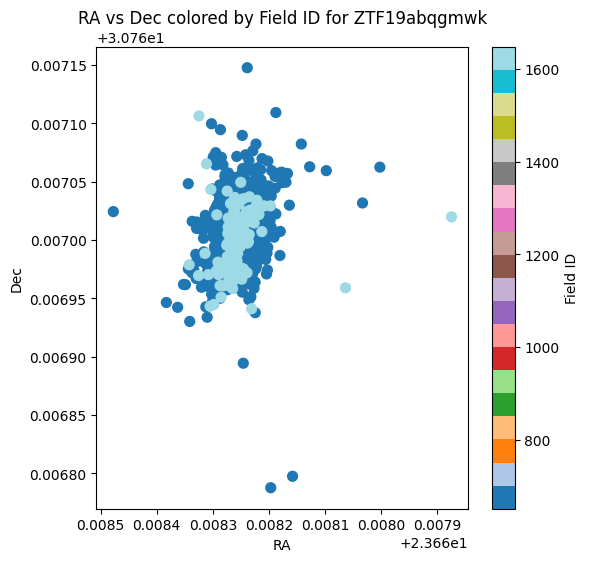

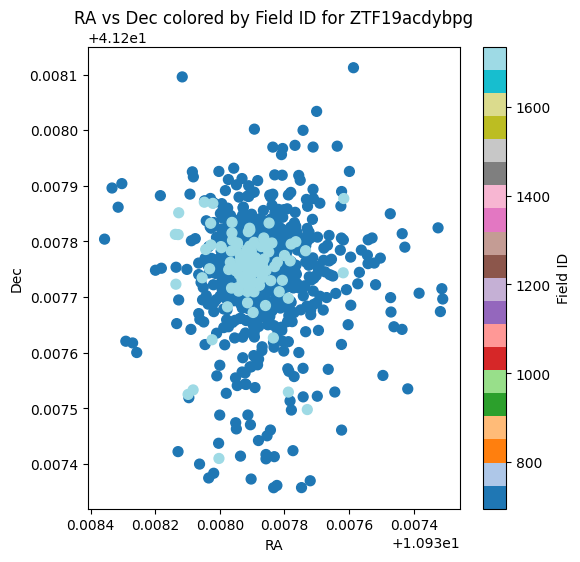

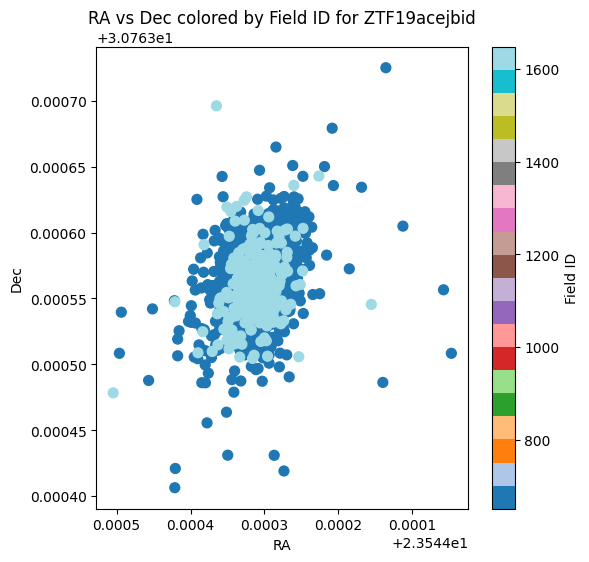

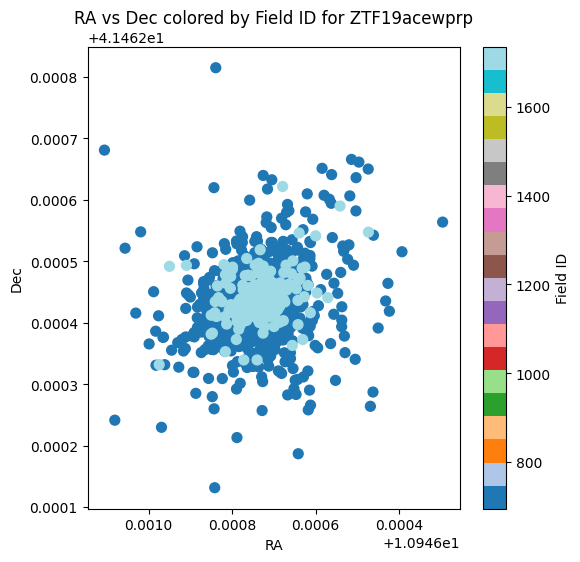

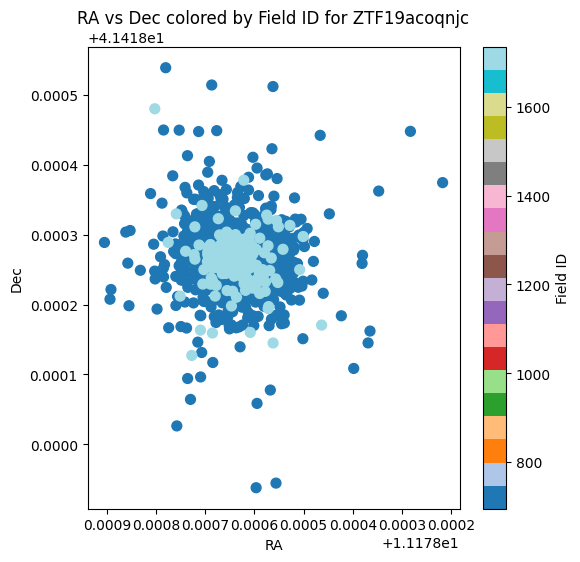

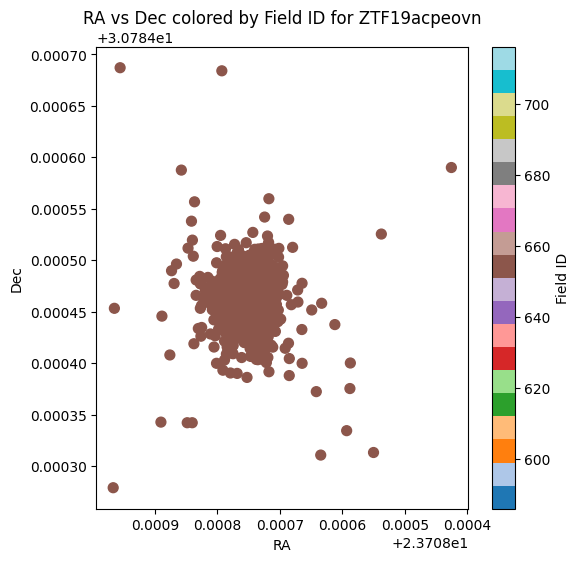

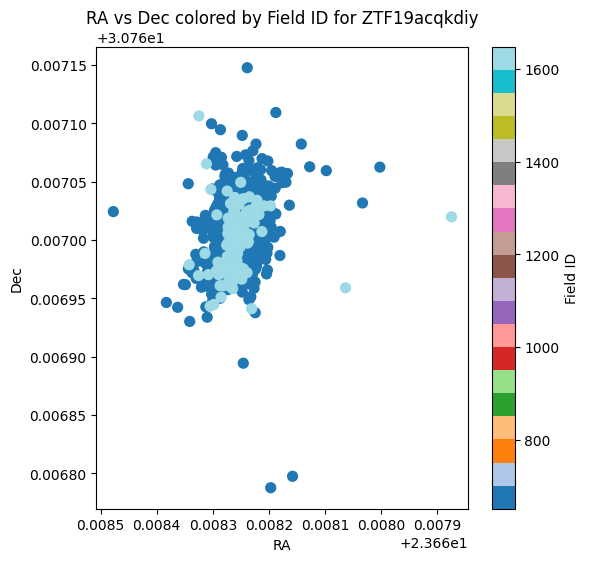

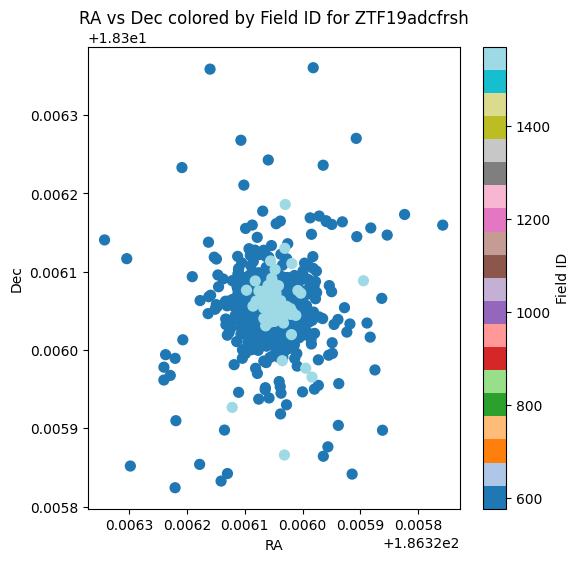

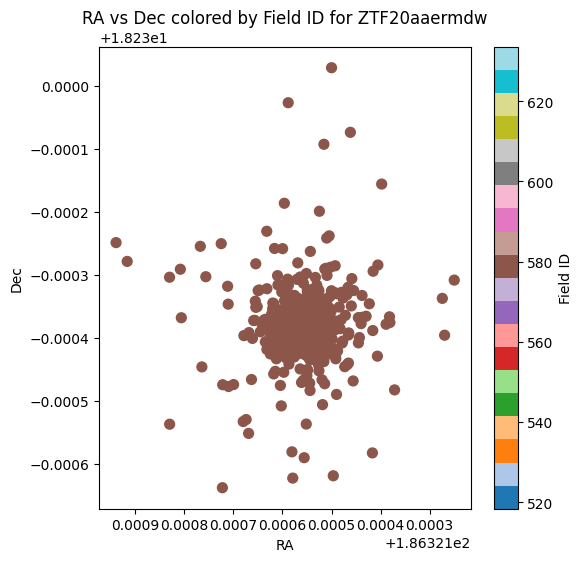

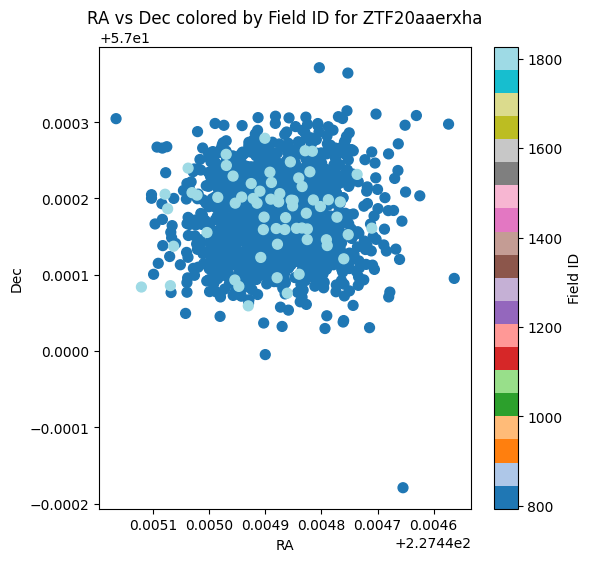

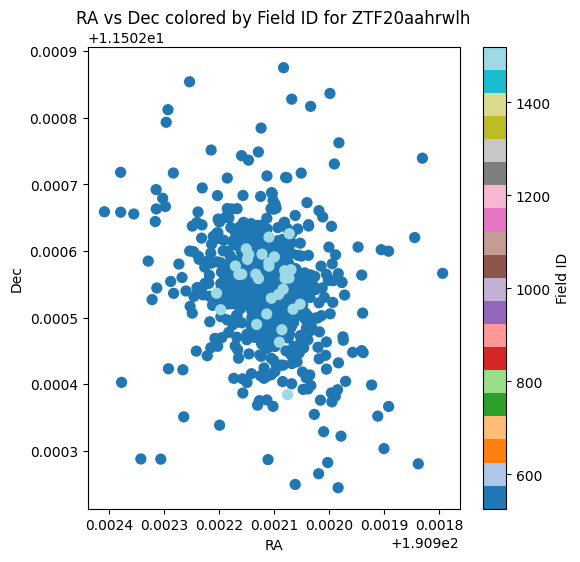

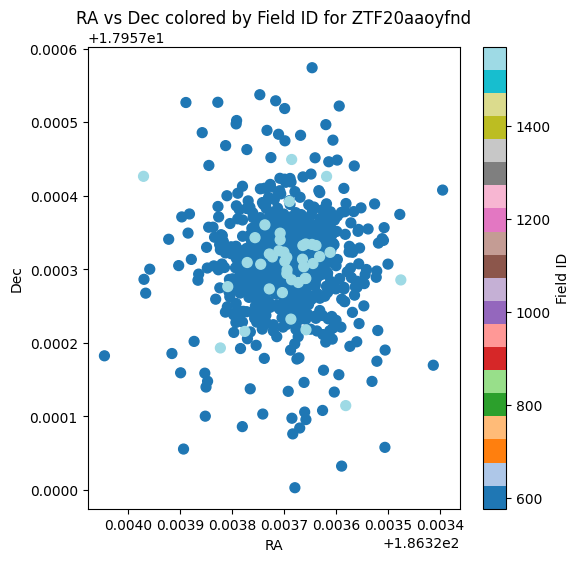

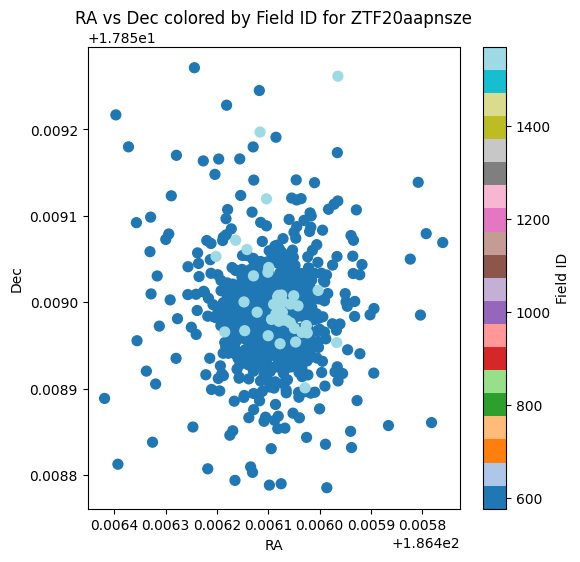

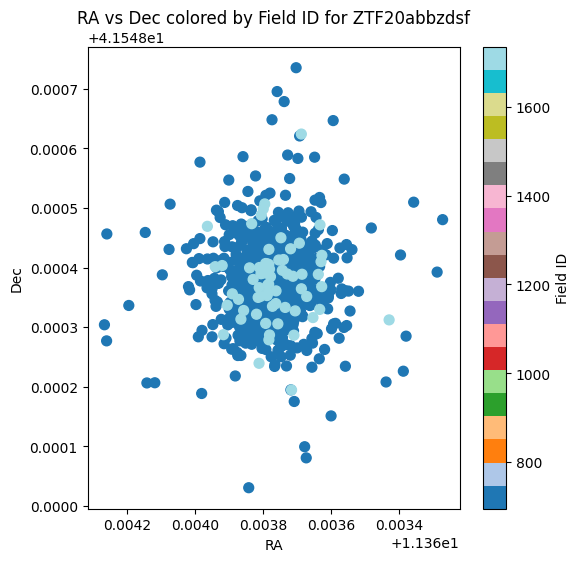

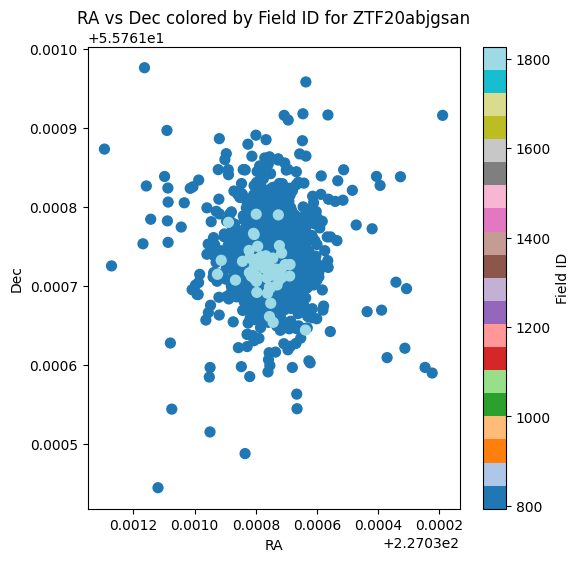

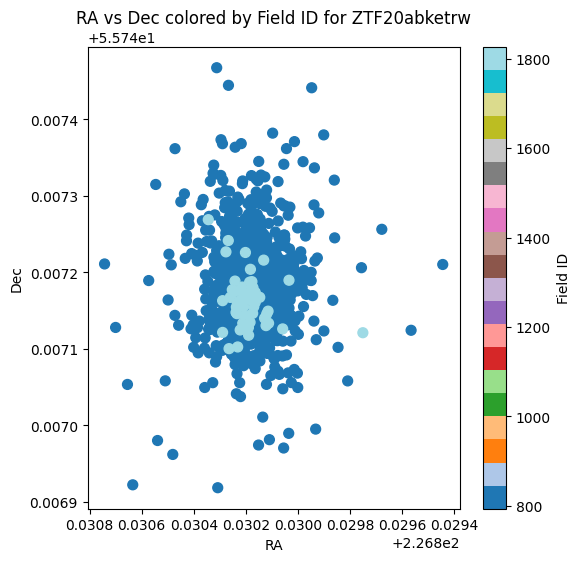

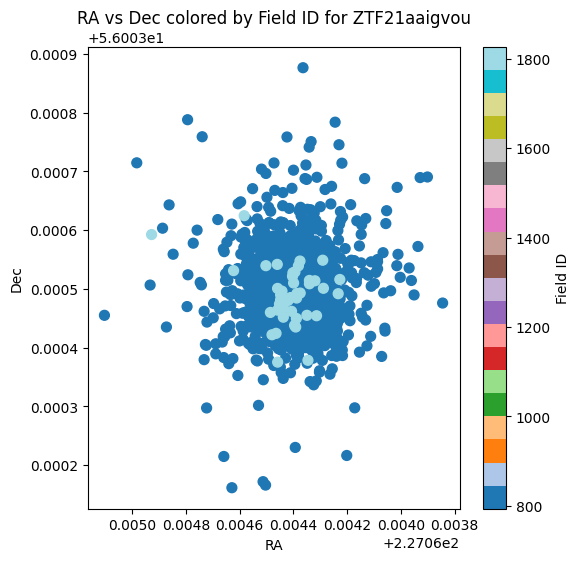

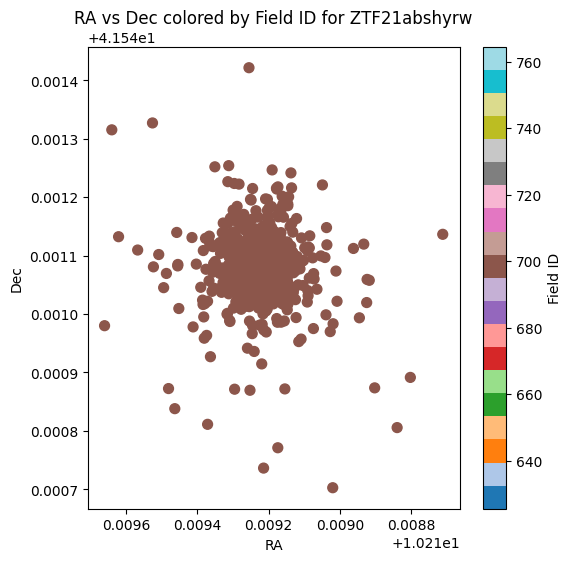

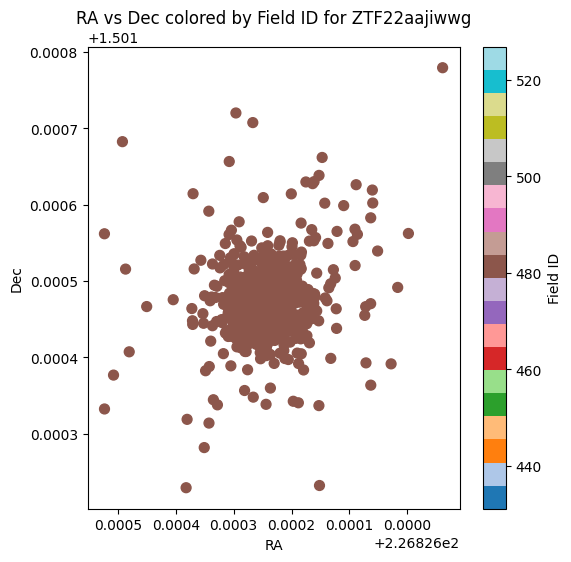

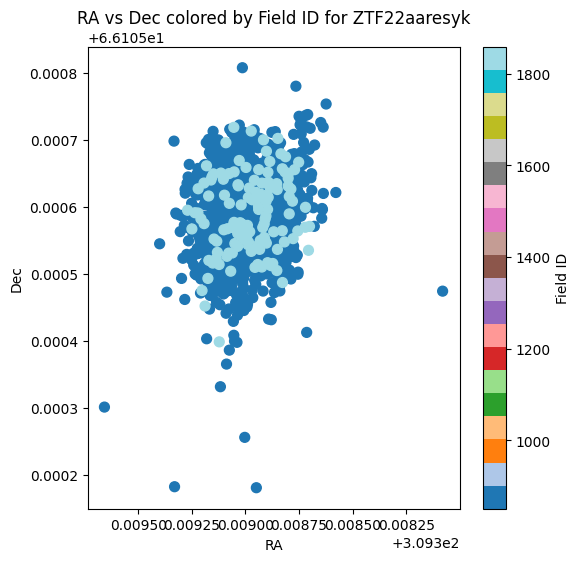

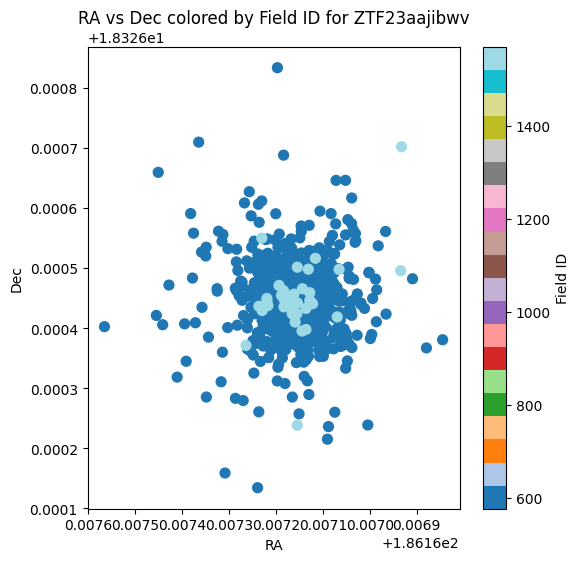

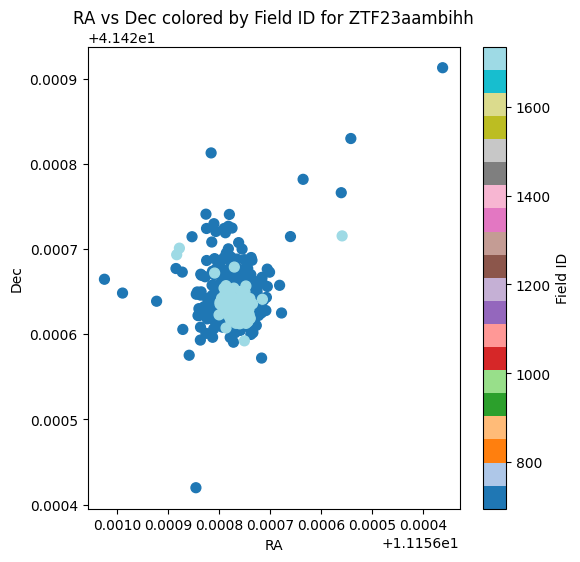

In [15]:
for file in file_list:
    
    data = pd.read_csv(file)
    
    ztf_id = file.split("/")[-1].split(".")[0]
    
    coords_obj = []
    field_id_list=[]
    
    ra = data['ra']
    dec = data['dec']
    
    field = data['field']

    possible_field_values = np.unique(field)

    X = np.vstack([ra, dec]).T

    if len(X) < 5:
        print(f"Skipping {ztf_id}: not enough coords for GMM")
        continue
    # Plot
    plt.figure(figsize=(6,6))
    scatter = plt.scatter(ra, dec, c=field, cmap='tab20', s=50)
    
    # Add colorbar with field IDs
    cbar = plt.colorbar(scatter)
    cbar.set_label("Field ID")
    
    plt.xlabel("RA")
    plt.ylabel("Dec")
    plt.title(f"RA vs Dec colored by Field ID for {ztf_id}")
    plt.gca().invert_xaxis()  # astronomical convention
    plt.show()
        
    # kmeans = KMeans(n_clusters=2)  
    # kmeans.fit(X)
    
    # labels = kmeans.labels_
    # # Plotting

    # inertias = []
    
    # for k in range(1, 6):
    #     kmeans = KMeans(n_clusters=k, random_state=42)
    #     kmeans.fit(X)
    #     inertias.append(kmeans.inertia_)  # sum of squared distances to centroids
    
    # # Plotting
    # plt.figure(figsize=(6,4))
    # plt.plot(range(1, 6), inertias, 'o-')
    # plt.xlabel('Number of clusters')
    # plt.ylabel('Inertia')
    # plt.show()


    # plt.figure(figsize=(6,6))
    
    # unique_labels = np.unique(labels)
    # colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))  # One color per label
    
    # for lbl, color in zip(unique_labels, colors):
    #     mask = labels == lbl
    #     plt.scatter(ra[mask], dec[mask], color=color, s=50, label=f'Cluster {lbl}')
    
    # plt.xlabel('RA')
    # plt.ylabel('Dec')
    # plt.title(f'K-Means Clustering for {ztf_id}')
    # plt.legend()
    # plt.show()
    

    
        

